In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
from datetime import date
from datetime import datetime
import itertools
import statsmodels.api as sm
import warnings
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.graphics.regressionplots import plot_leverage_resid2
import matplotlib.pyplot as plt
import scipy as sc


In [2]:
from sklearn.linear_model import Lasso
from sklearn import metrics


In [3]:
irf=pd.read_csv('c:/python/sgi_in_russia.csv',sep='\t',index_col='year',decimal=',')
irf.head()

,FSI,SGR,EROI,PRP,ES,ROEnv,RoL,ROEsr,RER,CR,...,ROA,ROE,EBIT,WACC,RG,NPG,NAG,FL,DOL,DER
year,,,,,,,,,,,,,,,,,,,,,
1996,0.25,0.1434,0.4300,0.17,2300.0,0.0350,0.0365,0.0225,0.2315,1.48,...,0.1373,0.1851,7.9230,0.0845,1.1690,-0.2340,-0.1180,1.4299,0.3763,0.3692
1997,0.26,0.1400,0.4500,0.16,2330.0,0.0500,0.0479,0.0275,0.2973,1.90,...,0.1274,0.1719,11.6525,0.0855,1.1659,0.2340,0.1180,1.4216,0.3716,0.3214
1998,0.21,0.1647,0.4400,0.17,2350.0,0.0562,0.0694,0.0350,0.4166,1.34,...,0.1507,0.2648,16.9833,0.0894,0.7895,0.1442,0.1447,1.4954,0.3924,0.7326
1999,0.19,0.1754,0.4375,0.17,2380.0,0.0339,0.0656,0.0413,0.5338,1.40,...,0.1481,0.2338,17.0332,0.0893,0.8730,0.0607,0.0150,1.4364,0.0040,0.5819
2000,0.23,0.1323,0.4375,0.17,2390.0,0.0525,0.0485,0.0470,0.3864,1.43,...,0.0962,0.1543,12.3710,0.1050,1.0248,-0.0953,-0.0227,1.5192,-0.1936,0.6012


In [4]:
icf=pd.read_csv('c:/python/sgi_in_china.csv',sep=';',decimal=',',index_col='year')
icf.head()

,FSI,SGR,EROI,PRP,ES,ROEnv,RoL,ROEsr,RER,CR,...,ROA,ROE,EBIT,WACC,RG,NPG,NAG,FL,DOL,DER
year,,,,,,,,,,,,,,,,,,,,,
1996,0.11,0.0020,0.10,0.1837,1800.0,0.0,0.00,0.03,0.0,0.8,...,0.2635,0.2798,19.1,0.06,0.3552,0.1914,0.1770,0.3748,0.6903,0.8210
1997,0.10,0.0018,0.11,0.1837,1700.0,0.0,0.08,0.04,0.3,0.8,...,0.2635,0.2798,19.1,0.07,0.3552,0.1914,0.1770,0.3748,0.6903,0.8210
1998,0.11,0.0008,0.11,0.1837,1600.0,0.0,0.07,0.05,0.3,0.9,...,0.2429,0.2636,18.0,0.06,0.1553,0.2790,0.2548,0.3042,1.6737,0.8244
1999,0.09,0.0087,0.12,0.1837,1600.0,0.0,0.06,0.04,0.3,0.7,...,0.2010,0.2118,17.0,0.08,0.2677,-0.1372,0.1568,0.3487,-1.7519,0.8256
2000,0.18,0.0100,0.13,0.1837,1500.0,0.0,0.08,0.03,0.3,0.8,...,0.1333,0.1591,18.0,0.60,-0.0175,0.3410,0.1648,0.2867,0.8823,0.8805


In [5]:
irf.index=list(map(lambda x: datetime(x,1,1,0,0,0), irf.index))

In [6]:
icf.index=list(map(lambda x: datetime(x,1,1,0,0,0), icf.index))
icf.head()

,FSI,SGR,EROI,PRP,ES,ROEnv,RoL,ROEsr,RER,CR,...,ROA,ROE,EBIT,WACC,RG,NPG,NAG,FL,DOL,DER
1996-01-01,0.11,0.0020,0.10,0.1837,1800.0,0.0,0.00,0.03,0.0,0.8,...,0.2635,0.2798,19.1,0.06,0.3552,0.1914,0.1770,0.3748,0.6903,0.8210
1997-01-01,0.10,0.0018,0.11,0.1837,1700.0,0.0,0.08,0.04,0.3,0.8,...,0.2635,0.2798,19.1,0.07,0.3552,0.1914,0.1770,0.3748,0.6903,0.8210
1998-01-01,0.11,0.0008,0.11,0.1837,1600.0,0.0,0.07,0.05,0.3,0.9,...,0.2429,0.2636,18.0,0.06,0.1553,0.2790,0.2548,0.3042,1.6737,0.8244
1999-01-01,0.09,0.0087,0.12,0.1837,1600.0,0.0,0.06,0.04,0.3,0.7,...,0.2010,0.2118,17.0,0.08,0.2677,-0.1372,0.1568,0.3487,-1.7519,0.8256
2000-01-01,0.18,0.0100,0.13,0.1837,1500.0,0.0,0.08,0.03,0.3,0.8,...,0.1333,0.1591,18.0,0.60,-0.0175,0.3410,0.1648,0.2867,0.8823,0.8805


In [7]:
irf1=irf[irf.index<datetime(2017,1,1,0,0,0)]
irf1.tail()

,FSI,SGR,EROI,PRP,ES,ROEnv,RoL,ROEsr,RER,CR,...,ROA,ROE,EBIT,WACC,RG,NPG,NAG,FL,DOL,DER
2012-01-01,0.22,0.1361,0.4367,0.18,2177.5,0.0366,0.0878,0.0450,0.7723,1.68,...,0.1112,0.1676,20.0532,0.1226,0.9705,-0.03870,0.0559,1.3035,-0.1433,0.5069
2013-01-01,0.25,0.1683,0.4305,0.18,2317.9,0.0391,0.0687,0.0453,0.9273,1.57,...,0.1057,0.1763,20.3163,0.1274,0.8593,0.01460,0.0466,1.2425,0.0112,0.6949
2014-01-01,0.29,0.1851,0.3350,0.17,2477.3,0.0432,0.0308,0.0610,0.9117,1.52,...,0.0842,0.1653,7.1334,0.1123,0.9405,-0.13440,-0.1203,1.2994,-0.6911,0.9318
2015-01-01,0.26,0.1876,0.2750,0.17,2685.0,0.0386,0.0393,0.0773,0.6550,1.41,...,0.0889,0.2043,7.7464,0.1108,0.9098,0.14141,-0.1860,1.3587,0.0115,1.4431
2016-01-01,0.20,0.2593,0.2167,0.18,2762.0,0.0340,0.0405,0.0700,0.6475,1.41,...,0.0889,0.2043,7.5000,0.1074,1.2565,-0.07114,0.1784,2.5000,-0.2951,1.2604


In [8]:
icf1=icf[icf.index<datetime(2017,1,1,0,0,0)]
icf1.tail()

,FSI,SGR,EROI,PRP,ES,ROEnv,RoL,ROEsr,RER,CR,...,ROA,ROE,EBIT,WACC,RG,NPG,NAG,FL,DOL,DER
2012-01-01,0.11,0.0143,0.14,0.0602,1678.0,0.0213,0.08,0.06,0.3,0.9477,...,0.0807,0.1227,17.491,0.20,0.0592,0.0421,0.1176,0.3928,-1.1537,1.1709
2013-01-01,0.08,0.0136,0.13,0.0607,1567.0,0.0143,0.09,0.07,0.3,0.7514,...,0.0712,0.1255,16.671,0.12,0.0096,-0.1260,0.0893,0.3804,5.2673,1.2727
2014-01-01,0.07,0.0098,0.12,0.0495,1467.0,0.0950,0.10,0.08,0.3,0.7886,...,0.0707,0.1012,17.015,0.20,-0.2782,-0.4122,0.0891,0.3327,1.6072,1.2381
2015-01-01,0.07,0.0033,0.10,0.0177,1325.0,0.0905,0.10,0.09,0.3,0.8741,...,0.0329,0.0359,7.882,0.20,-0.0260,-0.2303,0.0073,0.2961,-8.7119,1.0931
2016-01-01,0.10,0.0025,0.10,0.0123,1456.0,0.1003,0.10,0.08,0.3,0.9645,...,0.0205,0.0247,4.917,0.20,0.1000,0.0100,0.0600,0.3209,1.0000,1.0559


In [9]:
from sklearn.manifold import MDS
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA



In [10]:
from sklearn import mixture


In [11]:
preobr={'GINI':1, 'HDI':2, 'ER':1, 'Footprint':1, 'Biocapacity':2, 'GDP':1, 'GDP_growth':0, 'GDP_per_capita':0,
        'GDP_Annual_growth':0, 'Energy_Intensity_index':0, 'FSI':2, 'SGR':2, 'EROI':0, 'PRP':0, 'ES':0, 'ROEnv':2,
        'RoL':2, 'ROEsr':2, 'RER':2, 'CR':1, 'NWCT':0, 'ROFA':2, 'ROS':2, 'ROCE':2, 'ROA':2, 'ROE':2, 'EBIT':0, 'WACC':0,
        'RG':0, 'NPG':0, 'NAG':0, 'FL':0, 'DOL':0, 'DER':0}
iiirf1=np.array(irf1).T
iiicf1=np.array(icf1).T
#for num,el in enumerate(irf1.columns):
#    print (el, preobr[el], np.min(iiirf1[num]),np.max(iiirf1[num]))
#    iiirf1[num]= (iiirf1[num] if preobr[el]==0 else np.log(iiirf1[num]) if preobr[el]==1 else 
#        np.log((iiirf1[num]*0.98+0.01)/(0.99-0.98*iiirf1[num])))
#    iiicf1[num]= (iiicf1[num] if preobr[el]==0 else np.log(iiicf1[num]) if preobr[el]==1 else 
#        np.log((iiicf1[num]*0.98+0.01)/(0.99-0.98*iiicf1[num])))


In [12]:
from sklearn.preprocessing import StandardScaler
mms=StandardScaler().fit(np.vstack((iiirf1.T,iiicf1.T)))
irf2=pd.DataFrame(mms.transform(iiirf1.T),columns=irf1.columns,index=irf1.index)
icf2=pd.DataFrame(mms.transform(iiicf1.T),columns=icf1.columns,index=icf1.index)
icf2.head()
    

,FSI,SGR,EROI,PRP,ES,ROEnv,RoL,ROEsr,RER,CR,...,ROA,ROE,EBIT,WACC,RG,NPG,NAG,FL,DOL,DER
1996-01-01,-0.996554,-1.118814,-1.170223,0.621298,-0.678927,-1.282245,-2.729388,-1.236016,-1.993782,-1.453781,...,2.271784,1.596141,0.704302,-0.920004,-0.507029,0.686980,0.948608,-0.897799,0.344928,0.007315
1997-01-01,-1.134690,-1.121360,-1.102454,0.621298,-0.856291,-1.282245,0.168528,-0.656051,-0.573581,-1.453781,...,2.271784,1.596141,0.704302,-0.845205,-0.507029,0.686980,0.948608,-0.897799,0.344928,0.007315
1998-01-01,-0.996554,-1.134089,-1.102454,0.621298,-1.033656,-1.282245,-0.193712,-0.076086,-0.573581,-1.159115,...,1.917899,1.328201,0.462158,-0.920004,-0.970139,1.133177,1.757119,-1.018726,0.907998,0.019308
1999-01-01,-1.272827,-1.033528,-1.034685,0.621298,-1.033656,-1.282245,-0.555951,-0.656051,-0.573581,-1.748448,...,1.198104,0.471455,0.242026,-0.770407,-0.709741,-0.986766,0.738686,-0.942504,-1.053413,0.023541
2000-01-01,-0.029601,-1.016980,-0.966916,0.621298,-1.211021,-1.282245,0.168528,-1.236016,-0.573581,-1.453781,...,0.035094,-0.400177,0.462158,3.119115,-1.370467,1.448978,0.821823,-1.048701,0.454863,0.217193


In [13]:
raic=float("inf")
rkols=0
model=0
for kols in range(1,20):
    clf = mixture.GaussianMixture(n_components=kols, random_state=0)
    clf.fit(np.vstack((np.array(irf2),np.array(icf2))))
    rraic=clf.aic(np.vstack((np.array(irf2),np.array(icf2))))
    print ('Для {} score={}'.format(kols,rraic))
    if rraic<raic:
        raic=rraic
        rkols=kols
        model=clf


Для 1 score=1580.5241753537605
Для 2 score=-1360.5249338274816
Для 3 score=-2538.7823342773354
Для 4 score=-4022.49082218268
Для 5 score=-3898.1963686038625
Для 6 score=-3599.1353293662833
Для 7 score=-3248.1033172563
Для 8 score=-3168.1885714394357
Для 9 score=-3055.217920861236
Для 10 score=-2466.991510771162
Для 11 score=-2466.3899102574305
Для 12 score=-1958.4121544244408
Для 13 score=-1367.149669089671
Для 14 score=-776.6894875535945
Для 15 score=-292.74671608119934
Для 16 score=192.11663095399126
Для 17 score=564.3232120595767
Для 18 score=1184.6409494129111
Для 19 score=1805.5161694556991


In [14]:
clf = mixture.GaussianMixture(n_components=5, random_state=0)
clf.fit(np.vstack((np.array(irf2),np.array(icf2))))
res=clf.predict(irf2)
res

array([2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2],
      dtype=int64)

In [15]:
ces=clf.predict(icf2)
ces

array([4, 4, 4, 4, 4, 0, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [16]:
res1=clf.predict(np.vstack((np.array(irf2),np.array(icf2))))
res1

array([2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 4,
       4, 4, 4, 4, 0, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

# Внутренние параметры

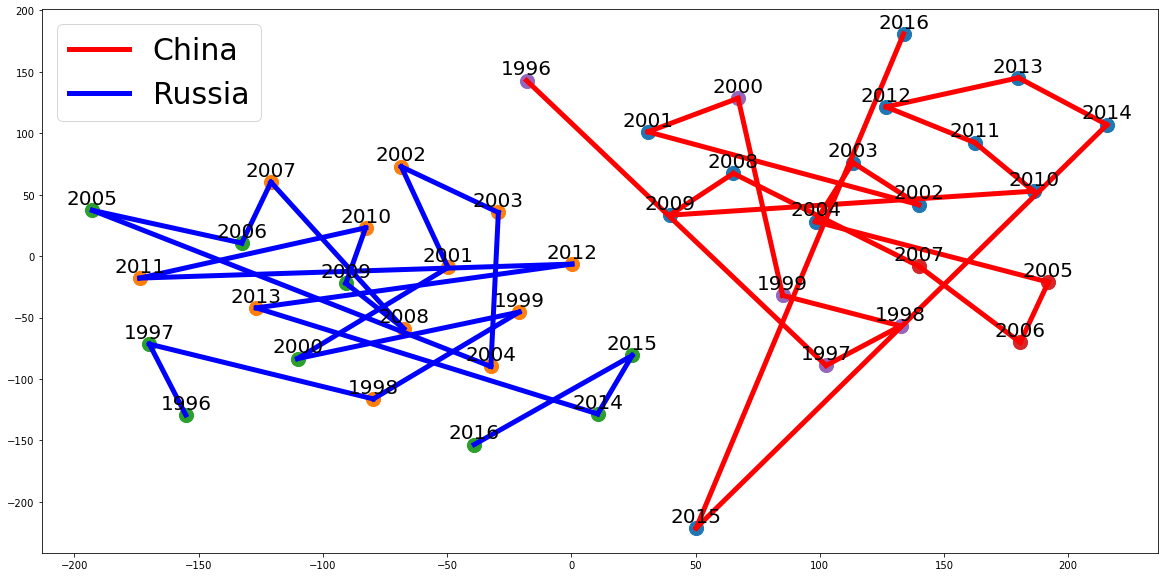

In [17]:
mdl=TSNE()
#mds_representation=mdl.fit_transform(np.vstack((X,kl2)))
mds_representation=mdl.fit_transform(np.vstack((np.array(irf2),np.array(icf2))))
plt.figure(figsize=(20,10))
xx=mds_representation.T[0]
yy=mds_representation.T[1]
xxr=mds_representation.T[0][:21]
yyr=mds_representation.T[1][:21]
xxc=mds_representation.T[0][21:]
yyc=mds_representation.T[1][21:]
plt.plot([xxc[0],xxc[1]],[yyc[0],yyc[1]],linewidth=5,color='red')
plt.plot([xxr[0],xxr[1]],[yyr[0],yyr[1]],linewidth=5,color='blue')
plt.legend(['China','Russia'],fontsize=30)
for el in range(2,len(xxc)):
    plt.plot([xxc[el-1],xxc[el]],[yyc[el-1],yyc[el]],linewidth=5,color='red')
for el in range(2,len(xxr)):
    plt.plot([xxr[el-1],xxr[el]],[yyr[el-1],yyr[el]],linewidth=5,color='blue')
for el in range(6):
    plt.scatter(xx[res1==el],yy[res1==el],200)
for el in range(len(xxc)):
    if icf2.index[el].month==1:
        plt.text(xxc[el],yyc[el]+5,'{}'.format(icf2.index[el].year),horizontalalignment='center',fontsize=20)
for el in range(len(xxr)):
    if irf2.index[el].month==1:
        plt.text(xxr[el],yyr[el]+5,'{}'.format(irf2.index[el].year),horizontalalignment='center',fontsize=20)

plt.show()

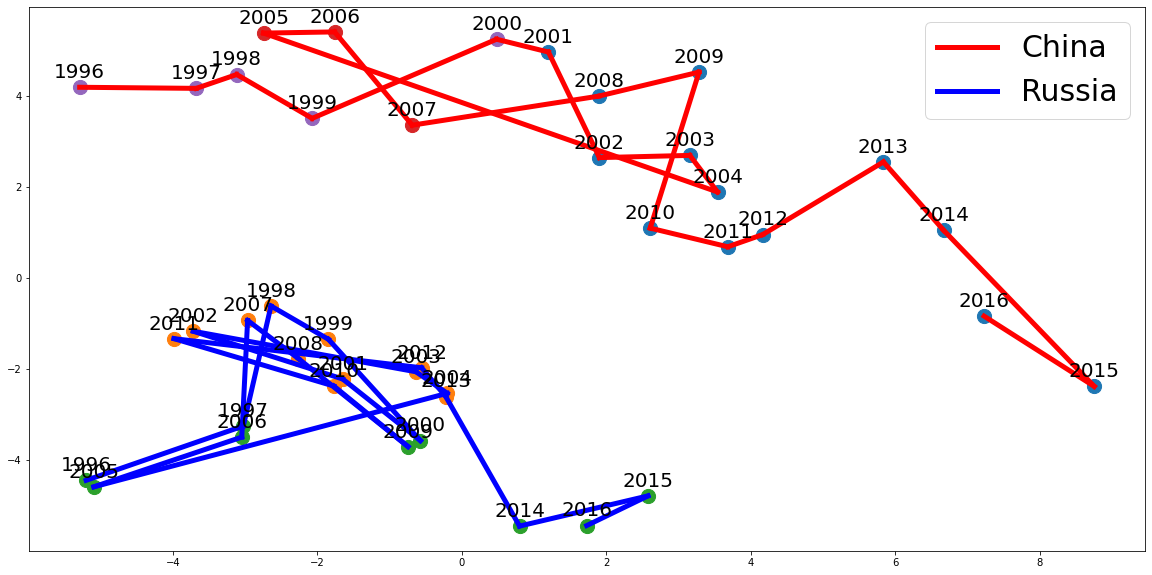

In [18]:
mdl=MDS()
#mds_representation=mdl.fit_transform(np.vstack((X,kl2)))
mds_representation=mdl.fit_transform(np.vstack((np.array(irf2),np.array(icf2))))
plt.figure(figsize=(20,10))
xx=mds_representation.T[0]
yy=mds_representation.T[1]
xxr=mds_representation.T[0][:21]
yyr=mds_representation.T[1][:21]
xxc=mds_representation.T[0][21:]
yyc=mds_representation.T[1][21:]
plt.plot([xxc[0],xxc[1]],[yyc[0],yyc[1]],linewidth=5,color='red')
plt.plot([xxr[0],xxr[1]],[yyr[0],yyr[1]],linewidth=5,color='blue')
plt.legend(['China','Russia'],fontsize=30)
for el in range(2,len(xxc)):
    plt.plot([xxc[el-1],xxc[el]],[yyc[el-1],yyc[el]],linewidth=5,color='red')
for el in range(2,len(xxr)):
    plt.plot([xxr[el-1],xxr[el]],[yyr[el-1],yyr[el]],linewidth=5,color='blue')
for el in range(6):
    plt.scatter(xx[res1==el],yy[res1==el],200)
for el in range(len(xxc)):
    if icf2.index[el].month==1:
        plt.text(xxc[el],yyc[el]+0.2,'{}'.format(icf2.index[el].year),horizontalalignment='center',fontsize=20)
for el in range(len(xxr)):
    if irf2.index[el].month==1:
        plt.text(xxr[el],yyr[el]+0.2,'{}'.format(irf2.index[el].year),horizontalalignment='center',fontsize=20)

plt.show()

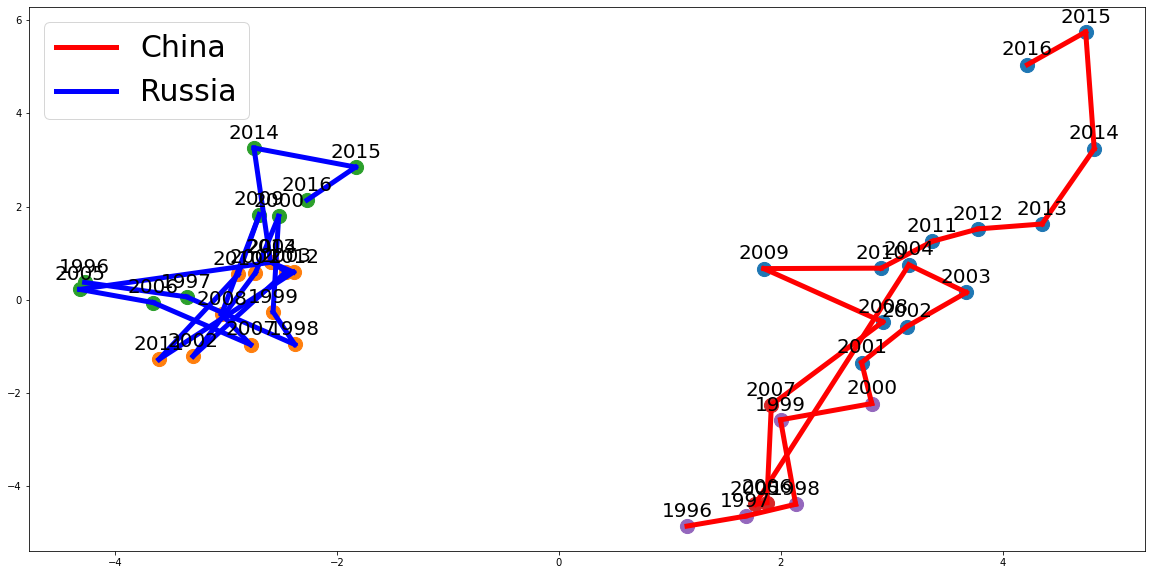

In [19]:
mdl=TruncatedSVD(n_components=2)
mds_representation=mdl.fit_transform(np.vstack((np.array(irf2),np.array(icf2))))
m1svd=mdl
plt.figure(figsize=(20,10))
xx=mds_representation.T[0]
yy=mds_representation.T[1]
xxr=mds_representation.T[0][:21]
xr1s=xxr
yyr=mds_representation.T[1][:21]
yr1s=yyr
xxc=mds_representation.T[0][21:]
xc1s=xxc
yyc=mds_representation.T[1][21:]
yc1s=yyc
plt.plot([xxc[0],xxc[1]],[yyc[0],yyc[1]],linewidth=5,color='red')
plt.plot([xxr[0],xxr[1]],[yyr[0],yyr[1]],linewidth=5,color='blue')
plt.legend(['China','Russia'],fontsize=30)
for el in range(2,len(xxc)):
    plt.plot([xxc[el-1],xxc[el]],[yyc[el-1],yyc[el]],linewidth=5,color='red')
for el in range(2,len(xxr)):
    plt.plot([xxr[el-1],xxr[el]],[yyr[el-1],yyr[el]],linewidth=5,color='blue')
for el in range(6):
    plt.scatter(xx[res1==el],yy[res1==el],200)
for el in range(len(xxc)):
    if icf2.index[el].month==1:
        plt.text(xxc[el],yyc[el]+0.2,'{}'.format(icf2.index[el].year),horizontalalignment='center',fontsize=20)
for el in range(len(xxr)):
    if irf2.index[el].month==1:
        plt.text(xxr[el],yyr[el]+0.2,'{}'.format(irf2.index[el].year),horizontalalignment='center',fontsize=20)

plt.show()

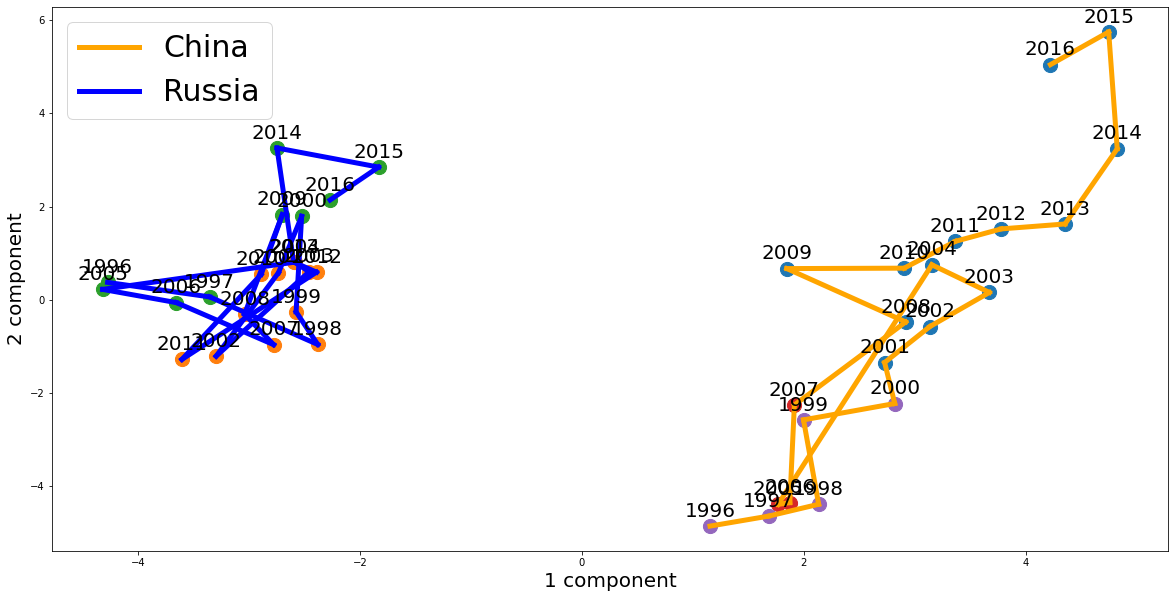

In [21]:
mdl=PCA(n_components=2)
mds_representation=mdl.fit_transform(np.vstack((np.array(irf2),np.array(icf2))))
m1=mdl
plt.figure(figsize=(20,10))
xx=mds_representation.T[0]
yy=mds_representation.T[1]
xxr=mds_representation.T[0][:21]
xr1=xxr
yyr=mds_representation.T[1][:21]
yr1=yyr
xxc=mds_representation.T[0][21:]
xc1=xxc
yyc=mds_representation.T[1][21:]
yc1=yyc
plt.plot([xxc[0],xxc[1]],[yyc[0],yyc[1]],linewidth=5,color='orange')
plt.plot([xxr[0],xxr[1]],[yyr[0],yyr[1]],linewidth=5,color='blue')
plt.legend(['China','Russia'],fontsize=30)
for el in range(2,len(xxc)):
    plt.plot([xxc[el-1],xxc[el]],[yyc[el-1],yyc[el]],linewidth=5,color='orange')
for el in range(2,len(xxr)):
    plt.plot([xxr[el-1],xxr[el]],[yyr[el-1],yyr[el]],linewidth=5,color='blue')
for el in range(6):
    plt.scatter(xx[res1==el],yy[res1==el],200)
for el in range(len(xxc)):
    if icf2.index[el].month==1:
        plt.text(xxc[el],yyc[el]+0.2,'{}'.format(icf2.index[el].year),horizontalalignment='center',fontsize=20)
for el in range(len(xxr)):
    if irf2.index[el].month==1:
        plt.text(xxr[el],yyr[el]+0.2,'{}'.format(irf2.index[el].year),horizontalalignment='center',fontsize=20)
plt.xlabel('1 component',fontsize=20)
plt.ylabel('2 component',fontsize=20)
#
plt.show()

In [22]:
mdl=TruncatedSVD(n_components=7)
mds_representation=mdl.fit_transform(np.vstack((np.array(irf2),np.array(icf2))))

In [23]:
for el in range(7):
    print('1-{}: {}'.format(el+1,np.sum(mdl.explained_variance_ratio_[:el+1])))

1-1: 0.3827759115981206
1-2: 0.6171870742886785
1-3: 0.6967976731079794
1-4: 0.7529741616740425
1-5: 0.7992788669727853
1-6: 0.8440064500470486
1-7: 0.8847826389343867


In [24]:
qqq1=pd.DataFrame(mdl.components_.T,columns=range(1,8),index=irf1.columns)
qqq1

,1,2,3,4,5,6,7
FSI,-0.300975,0.040101,-0.116235,-0.077396,-0.034017,-0.086022,-0.080111
SGR,-0.302018,0.094003,-0.116141,-0.087516,0.165913,0.057873,-0.017693
EROI,-0.306750,0.068346,-0.066645,-0.016445,-0.219074,0.103262,0.030635
PRP,-0.198893,-0.243048,-0.083735,-0.226474,0.110415,-0.297568,-0.214887
ES,-0.205114,0.021348,-0.231680,0.392833,0.101049,0.187143,0.157774
ROEnv,-0.061402,0.292894,-0.033427,0.299336,-0.186160,0.334080,0.345255
RoL,0.204454,-0.018207,-0.366070,-0.200089,-0.355274,0.009324,0.129789
ROEsr,0.202293,0.188382,-0.202622,0.003709,0.314460,0.063683,0.255391
RER,-0.178004,0.117510,-0.366550,-0.314902,0.245184,0.064076,0.046379
CR,-0.250649,-0.000840,-0.246453,-0.148613,-0.168512,-0.125901,0.124985


In [25]:
qqq2=qqq1.T
qqq3=qqq2.corrwith(qqq2.SGR)
pd.DataFrame(qqq3,columns=['SGR']).sort_values(by='SGR')

,SGR
WACC,-0.564044
ROFA,-0.400551
RoL,-0.384177
NAG,-0.317460
ROS,-0.235356
ROCE,-0.165708
NPG,-0.142236
ROA,-0.080328
EBIT,-0.061859
DOL,0.025521


C:\Users\inf_s\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\inf_s\anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  # This is added back by InteractiveShellApp.init_path()


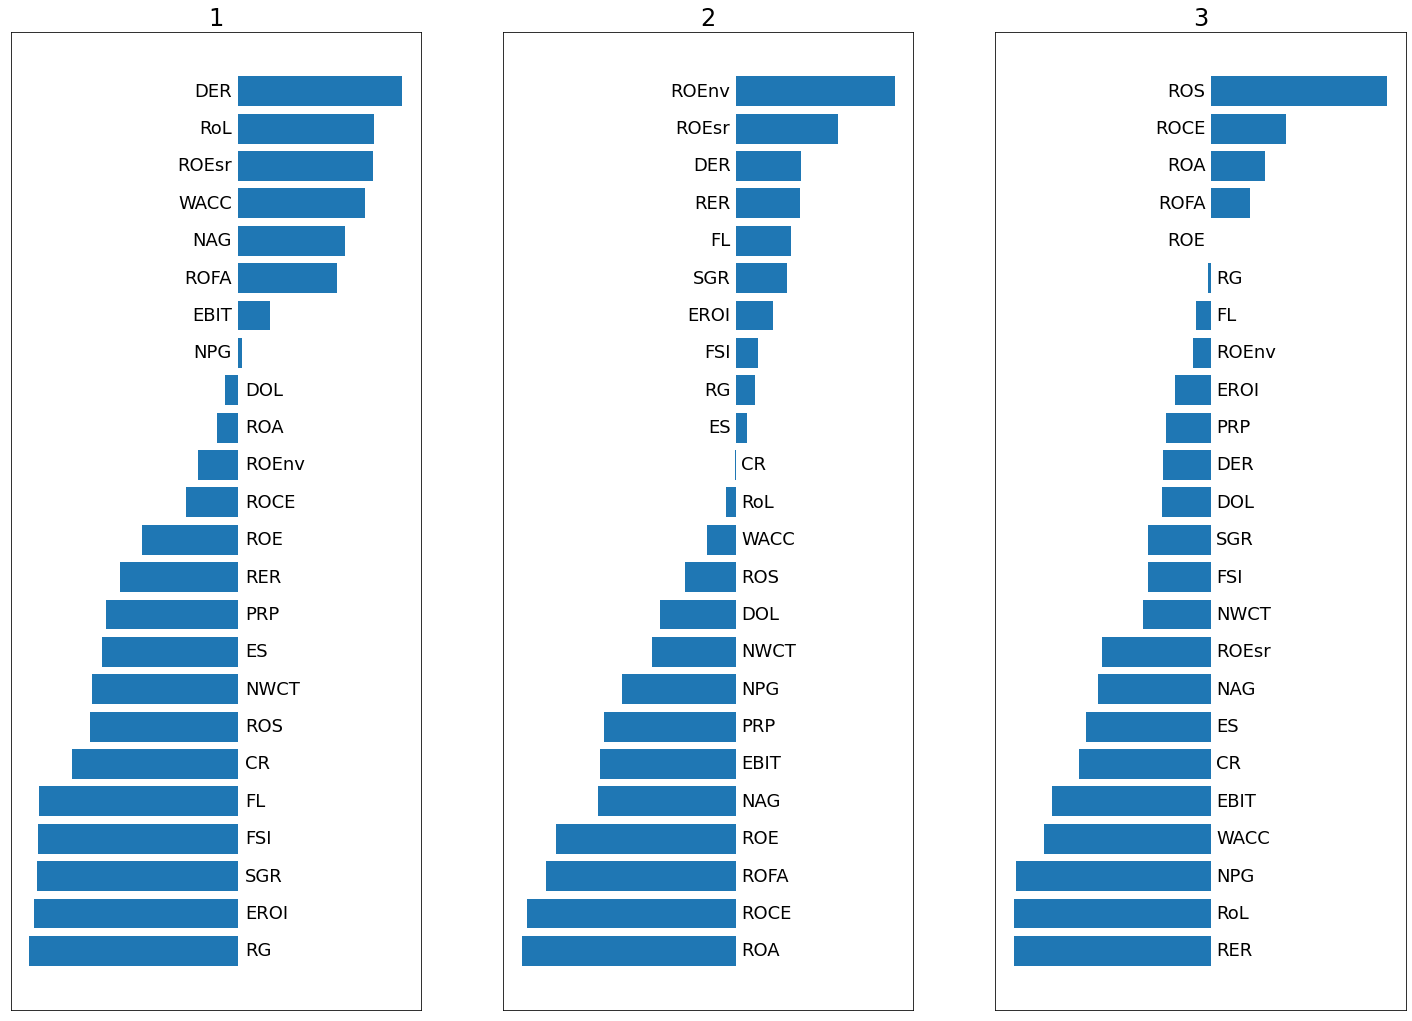

C:\Users\inf_s\anaconda3\lib\site-packages\ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
C:\Users\inf_s\anaconda3\lib\site-packages\ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
C:\Users\inf_s\anaconda3\lib\site-packages\ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
C:\Users\inf_s\anaconda3\lib\site-packages\ipykernel_launcher.py:41: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-onl

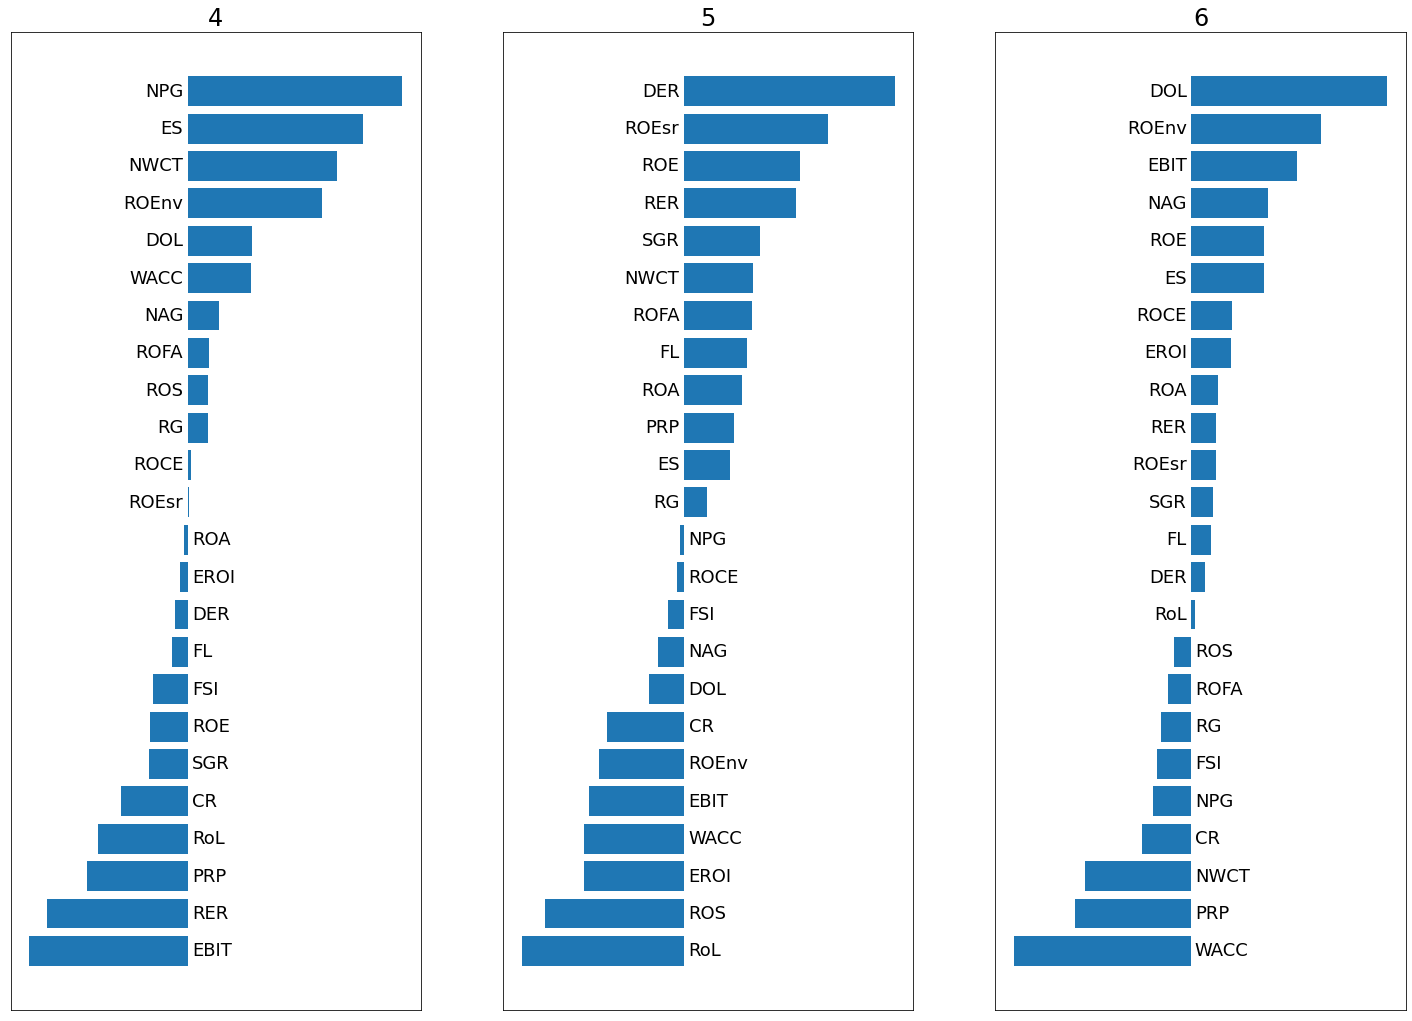

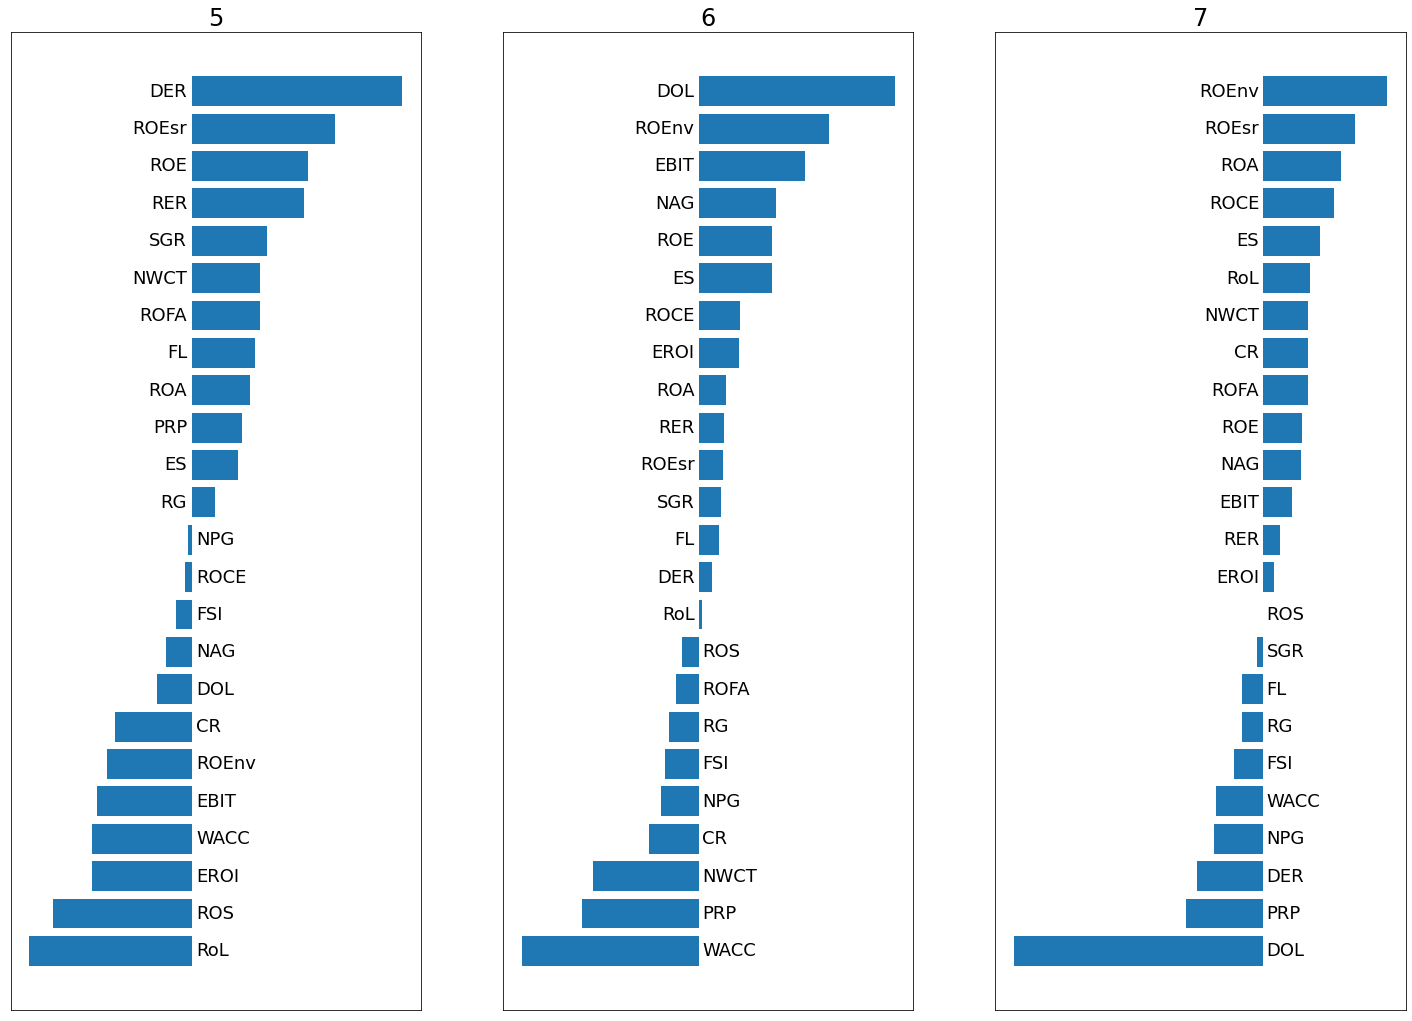

In [26]:
fig,axes=plt.subplots(1,3,figsize=(25,18))
plt.rcParams['font.size'] = 20
plt.rcParams['lines.linewidth'] = 5

for el in range(3):
    tt=sorted(list(zip(qqq1.index,qqq1[el+1])),key=lambda x: x[1])
    qqq2=np.double(np.array(tt).T[1])
    qqq3=np.array(tt).T[0]
    axes[el].barh(range(len(tt)),qqq2,left=-0.5)
    axes[el].set_xticks([],[])
    axes[el].set_yticks([],[])
    axes[el].set_title(el+1)
    for xx in range(len(tt)):
        if qqq2[xx]<0:
            axes[el].text(-0.49,xx,qqq3[xx],horizontalalignment='left',verticalalignment='center',fontsize=18)
        else:
            axes[el].text(-0.51,xx,qqq3[xx],horizontalalignment='right',verticalalignment='center',fontsize=18)
plt.show()

fig,axes=plt.subplots(1,3,figsize=(25,18))
for el in range(3,6):
    tt=sorted(list(zip(qqq1.index,qqq1[el+1])),key=lambda x: x[1])
    qqq2=np.double(np.array(tt).T[1])
    qqq3=np.array(tt).T[0]
    axes[el-3].barh(range(len(tt)),qqq2,left=-0.5)
    axes[el-3].set_xticks([],[])
    axes[el-3].set_yticks([],[])
    axes[el-3].set_title(el+1)
    for xx in range(len(tt)):
        if qqq2[xx]<0:
            axes[el-3].text(-0.49,xx,qqq3[xx],horizontalalignment='left',verticalalignment='center',fontsize=18)
        else:
            axes[el-3].text(-0.51,xx,qqq3[xx],horizontalalignment='right',verticalalignment='center',fontsize=18)
fig,axes=plt.subplots(1,3,figsize=(25,18))
for el in range(4,7):
    tt=sorted(list(zip(qqq1.index,qqq1[el+1])),key=lambda x: x[1])
    qqq2=np.double(np.array(tt).T[1])
    qqq3=np.array(tt).T[0]
    axes[el-4].barh(range(len(tt)),qqq2,left=-0.5)
    axes[el-4].set_xticks([],[])
    axes[el-4].set_yticks([],[])
    axes[el-4].set_title(el+1)
    for xx in range(len(tt)):
        if qqq2[xx]<0:
            axes[el-4].text(-0.49,xx,qqq3[xx],horizontalalignment='left',verticalalignment='center',fontsize=18)
        else:
            axes[el-4].text(-0.51,xx,qqq3[xx],horizontalalignment='right',verticalalignment='center',fontsize=18)
plt.show()

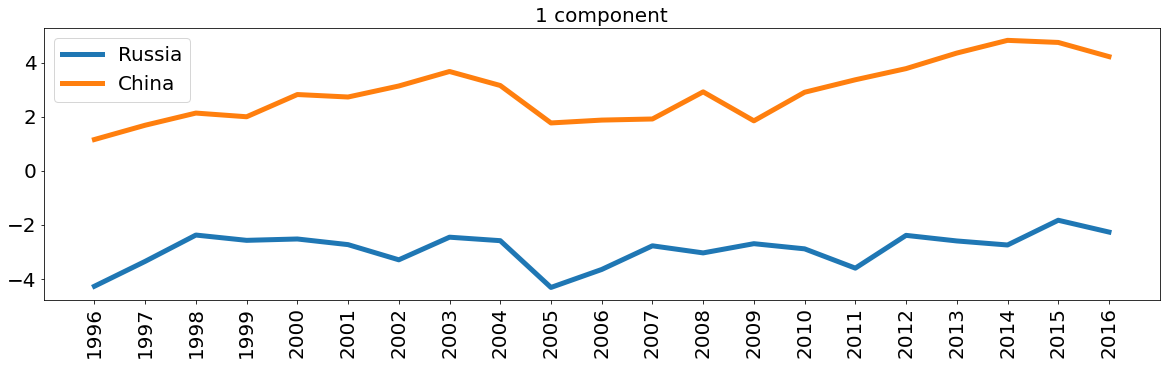

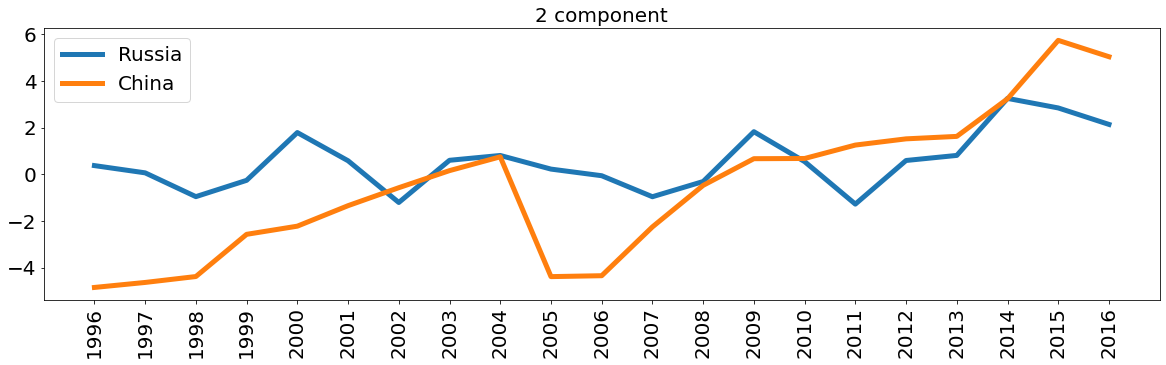

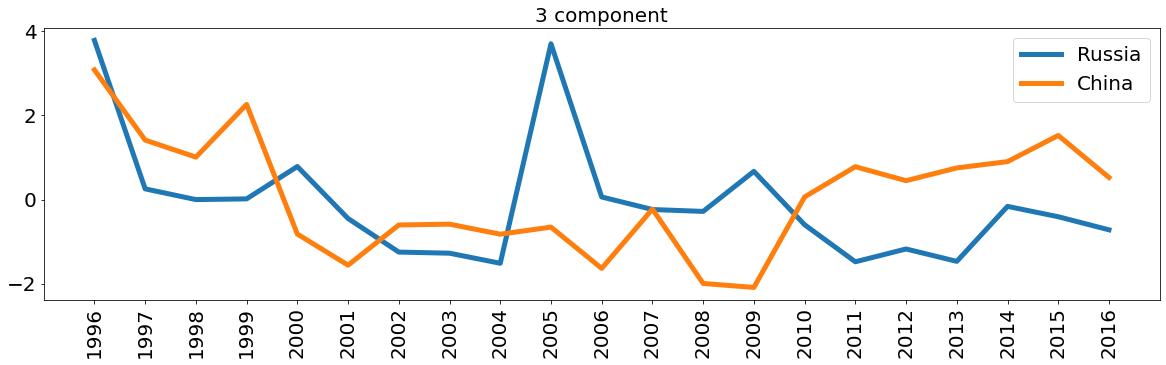

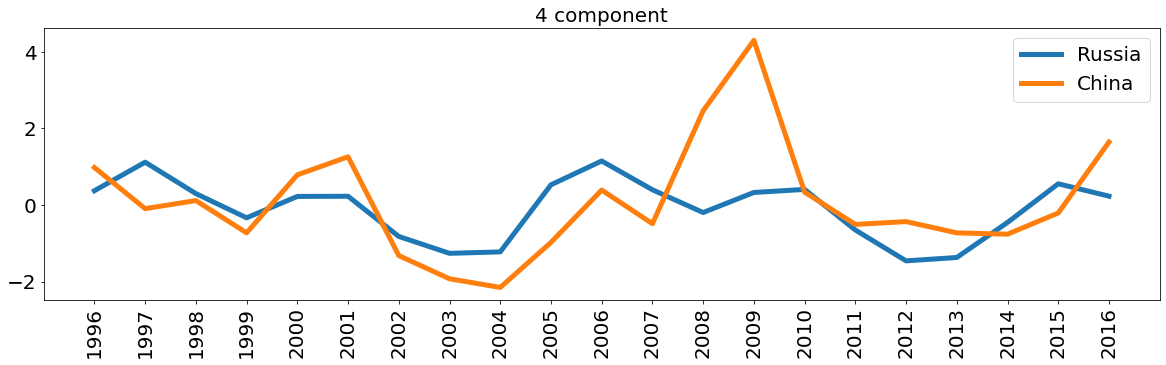

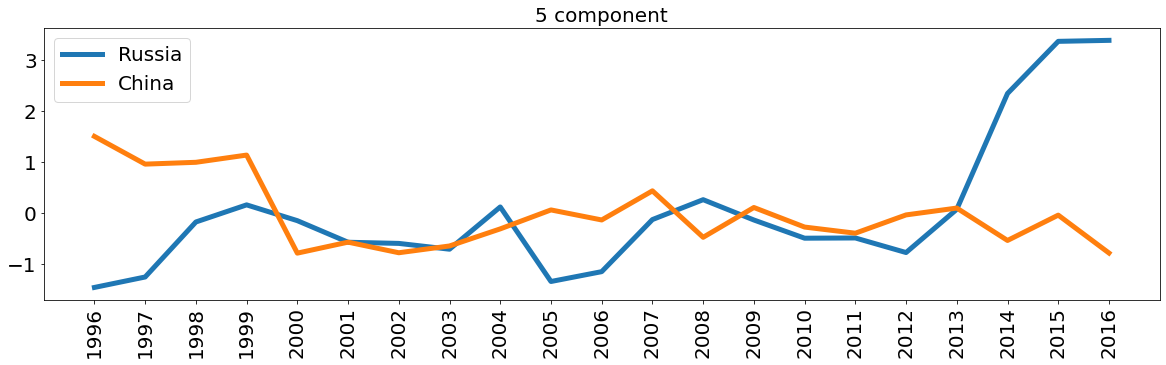

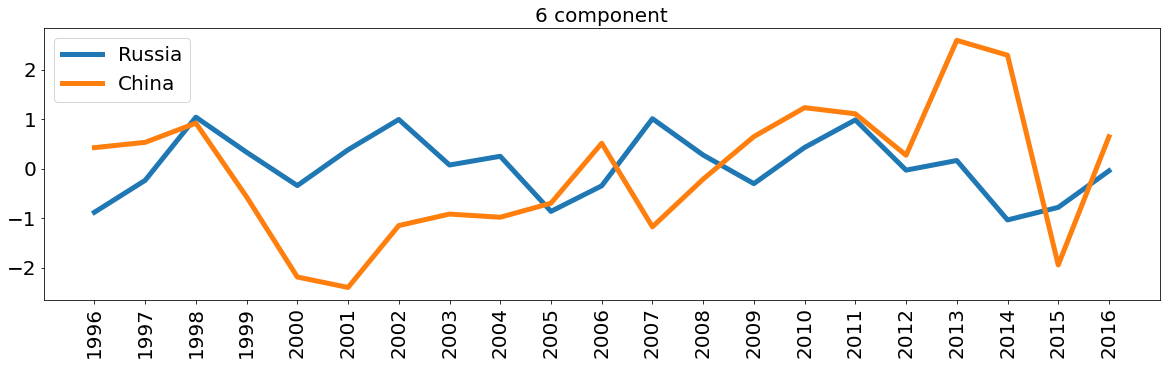

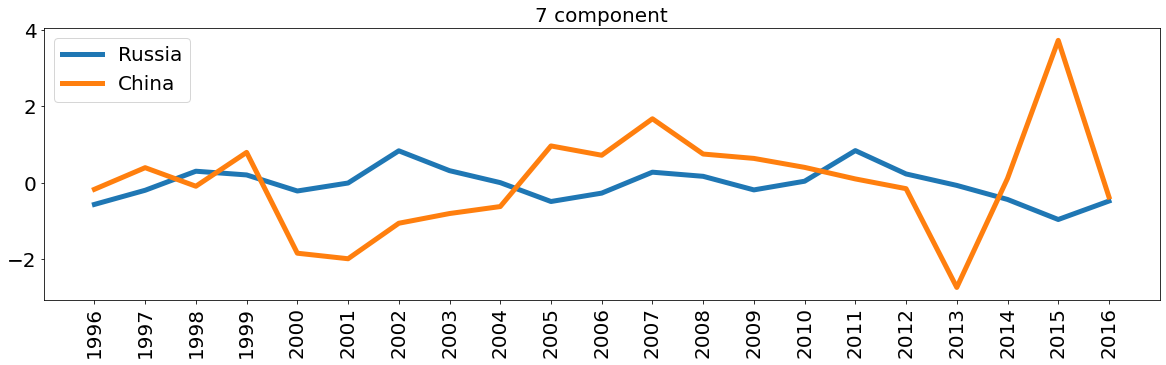

In [27]:
for el in range(7):
    plt.figure(figsize=(20,5))
    plt.title('{} component'.format(el+1),fontsize=20)
    plt.plot(range(1996,2017),mds_representation[:21].T[el],linewidth=5)
    plt.plot(range(1996,2017),mds_representation[21:].T[el],linewidth=5)
    plt.legend(['Russia', 'China'])
    plt.xticks(range(1996,2017),range(1996,2017),rotation='vertical')
    plt.show()    

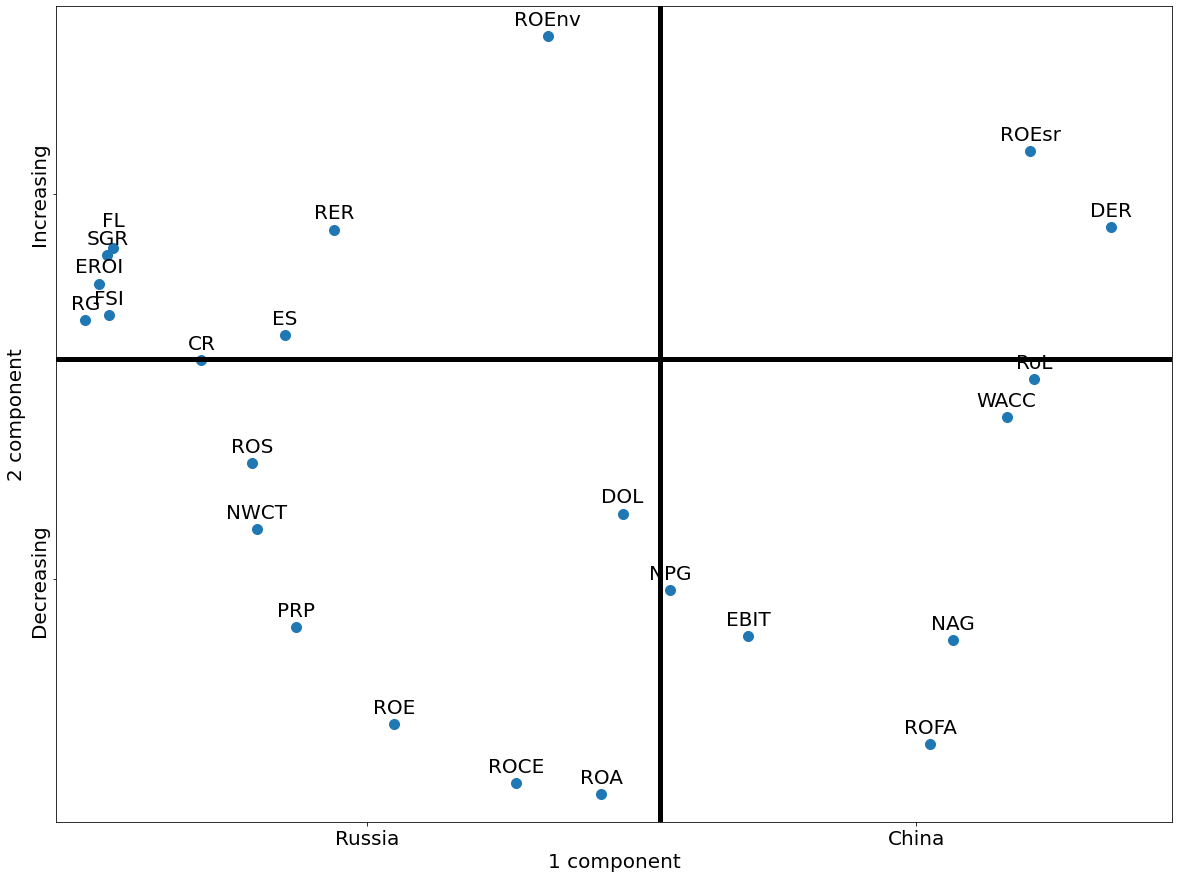

In [28]:
plt.figure(figsize=(20,15))
plt.scatter(qqq1[1],qqq1[2],100)
plt.plot([-0.33,0.28],[0,0],color='black')
plt.xticks([-0.16,0.14],['Russia','China'])
plt.yticks([-0.2,0.15],['Decreasing', 'Increasing'],rotation='vertical', verticalalignment='center')
plt.xlim((-0.33,0.28))
plt.plot([0,0],[-0.42,0.32],color='black')
plt.ylim((-0.42,0.32))
qqq3=qqq1.index
plt.xlabel('1 component')
plt.ylabel('2 component')
for el in range(len(qqq3)):
    tt=0.01
    if qqq3[el]=='FL':
        tt=0.02
    plt.text(qqq1[1][qqq3[el]],qqq1[2][qqq3[el]]+tt,qqq3[el],horizontalalignment='center',fontsize=20)

plt.show()

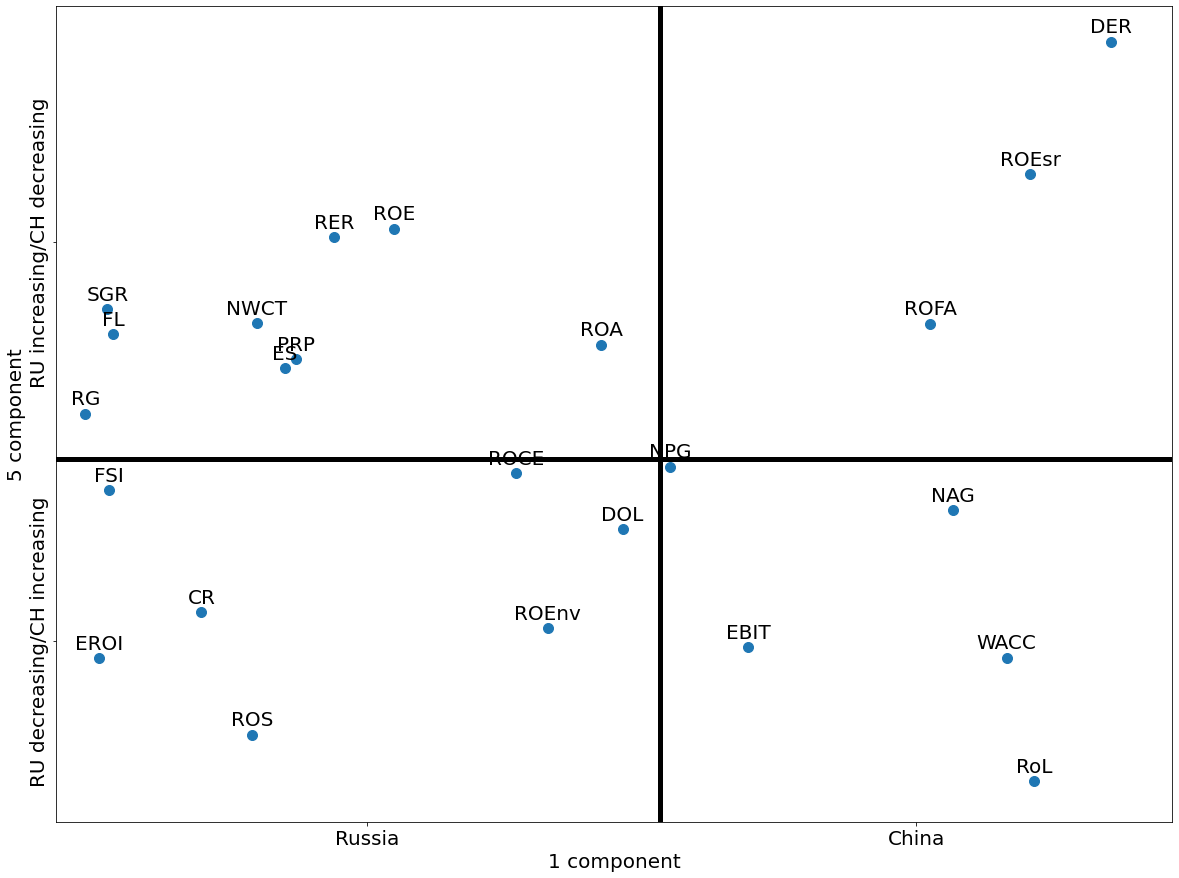

In [29]:
plt.figure(figsize=(20,15))
plt.scatter(qqq1[1],qqq1[5],100)
plt.plot([-0.33,0.28],[0,0],color='black')
plt.xticks([-0.16,0.14],['Russia','China'])
plt.yticks([-0.2,0.24],['RU decreasing/CH increasing', 'RU increasing/CH decreasing'],rotation='vertical', verticalalignment='center')
plt.xlim((-0.33,0.28))
plt.plot([0,0],[-0.4,0.5],color='black')
plt.ylim((-0.4,0.5))
qqq3=qqq1.index
plt.xlabel('1 component')
plt.ylabel('5 component')
for el in range(len(qqq3)):
    plt.text(qqq1[1][qqq3[el]],qqq1[5][qqq3[el]]+0.01,qqq3[el],horizontalalignment='center',fontsize=20)

plt.show()

In [30]:
ff1=pd.DataFrame(np.array([range(14)]).T+21,columns=['x'])
ff1['x2']=ff1['x']**2
ff1.index=list(map(lambda x: datetime(x+1996,1,1,0,0,0),ff1.x))

ff1.tail()

,x,x2
2026-01-01,30,900
2027-01-01,31,961
2028-01-01,32,1024
2029-01-01,33,1089
2030-01-01,34,1156


best parameters: (0, 0, 0, 0). AIC=47.32813413382459
best parameters: (0, 0, 0, 1). AIC=44.88295045708996
best parameters: (0, 0, 1, 0). AIC=44.680506660894295
best parameters: (0, 1, 0, 1). AIC=44.32398209951324
best parameters: (1, 1, 0, 1). AIC=43.94913978251057
best parameters: (1, 1, 1, 0). AIC=43.45130002360001
                                     SARIMAX Results                                      
Dep. Variable:                                 c1   No. Observations:                   21
Model:             SARIMAX(1, 1, 1)x(1, 0, [], 9)   Log Likelihood                 -16.726
Date:                            Sat, 15 Aug 2020   AIC                             43.451
Time:                                    20:16:28   BIC                             48.430
Sample:                                01-01-1996   HQIC                            44.423
                                     - 01-01-2016                                         
Covariance Type:                            

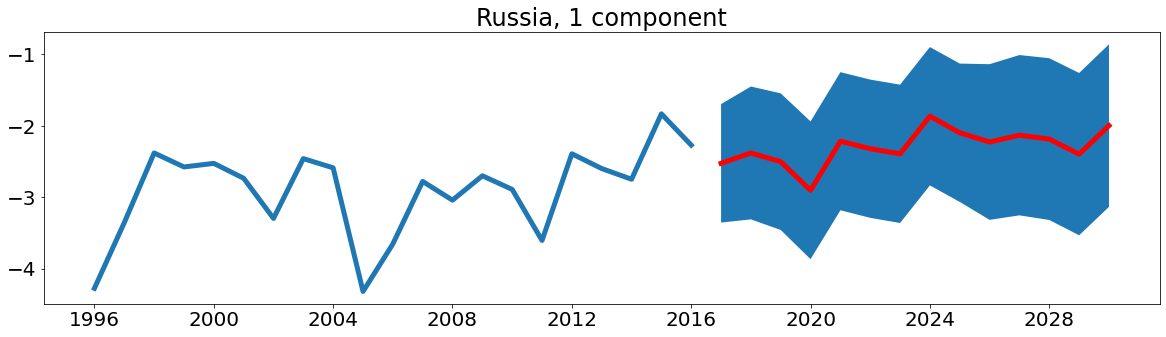

best parameters: (0, 0, 0, 0). AIC=71.97766269484987
best parameters: (0, 0, 0, 1). AIC=67.14998341994564
best parameters: (0, 0, 1, 0). AIC=65.07886034619501
                                     SARIMAX Results                                     
Dep. Variable:                                c2   No. Observations:                   21
Model:             SARIMAX(0, 1, 0)x(1, 0, 0, 9)   Log Likelihood                 -29.539
Date:                           Sat, 15 Aug 2020   AIC                             65.079
Time:                                   20:16:33   BIC                             68.066
Sample:                               01-01-1996   HQIC                            65.662
                                    - 01-01-2016                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------

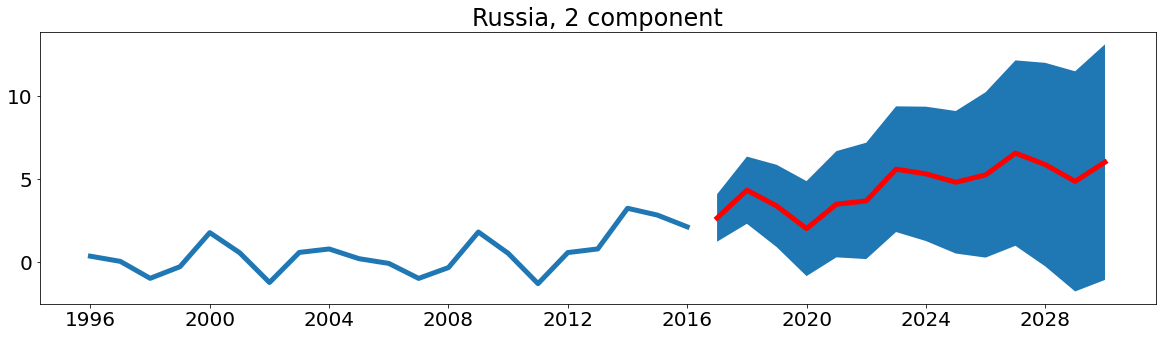

best parameters: (0, 0, 0, 0). AIC=82.82217400349788
best parameters: (0, 0, 0, 1). AIC=78.62012390423018
best parameters: (0, 1, 0, 0). AIC=76.88386444475488
best parameters: (0, 1, 0, 1). AIC=68.90569849309432
best parameters: (0, 1, 1, 0). AIC=68.80029316957781
                                     SARIMAX Results                                      
Dep. Variable:                                 c3   No. Observations:                   21
Model:             SARIMAX(0, 1, 1)x(1, 0, [], 9)   Log Likelihood                 -30.400
Date:                            Sat, 15 Aug 2020   AIC                             68.800
Time:                                    20:16:37   BIC                             72.783
Sample:                                01-01-1996   HQIC                            69.578
                                     - 01-01-2016                                         
Covariance Type:                              opg                                         
       

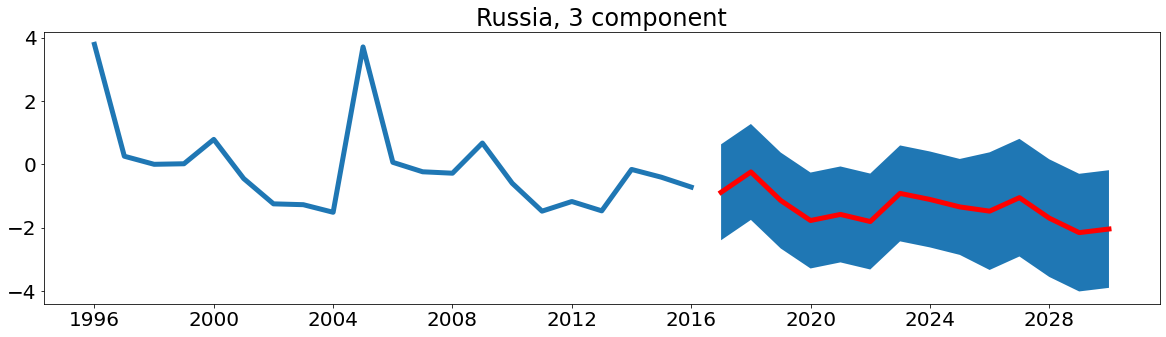

best parameters: (0, 0, 0, 0). AIC=49.91960148220973
best parameters: (0, 0, 0, 1). AIC=42.613389603468384
best parameters: (0, 0, 1, 0). AIC=33.12935094353415
                                     SARIMAX Results                                     
Dep. Variable:                                c4   No. Observations:                   21
Model:             SARIMAX(0, 1, 0)x(1, 0, 0, 9)   Log Likelihood                 -13.565
Date:                           Sat, 15 Aug 2020   AIC                             33.129
Time:                                   20:16:41   BIC                             36.117
Sample:                               01-01-1996   HQIC                            33.712
                                    - 01-01-2016                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------

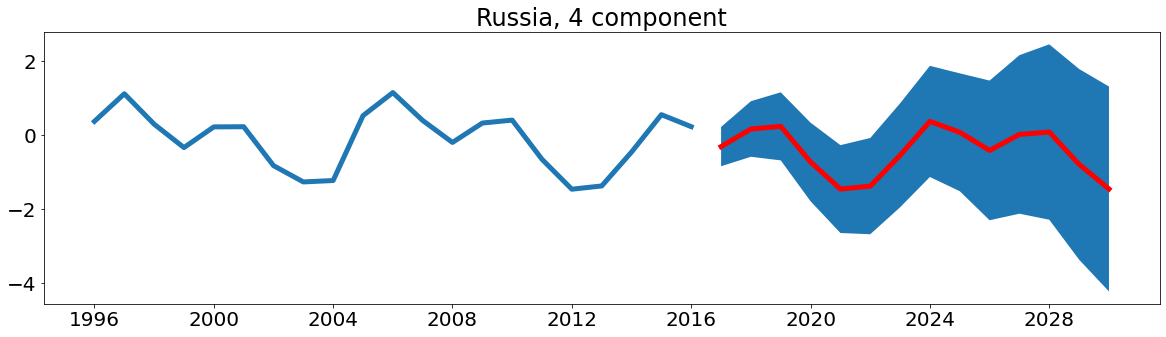

best parameters: (0, 0, 0, 0). AIC=50.15090181800795
                               SARIMAX Results                                
Dep. Variable:                     c5   No. Observations:                   21
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 -23.075
Date:                Sat, 15 Aug 2020   AIC                             50.151
Time:                        20:16:44   BIC                             52.142
Sample:                    01-01-1996   HQIC                            50.540
                         - 01-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x              0.2422      0.178      1.360      0.174      -0.107       0.591
sigma2         0.5884      0.159      3.712      0.000       0.278       0.899

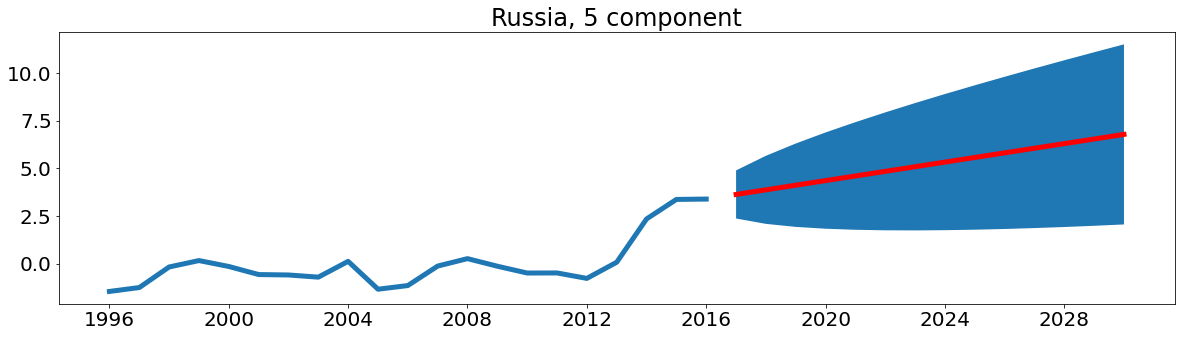

best parameters: (0, 0, 0, 0). AIC=51.98989922520722
best parameters: (0, 0, 0, 1). AIC=41.94136013367327
best parameters: (0, 0, 1, 0). AIC=24.034583163461413
                                     SARIMAX Results                                     
Dep. Variable:                                c6   No. Observations:                   21
Model:             SARIMAX(0, 1, 0)x(1, 0, 0, 9)   Log Likelihood                  -9.017
Date:                           Sat, 15 Aug 2020   AIC                             24.035
Time:                                   20:16:49   BIC                             27.022
Sample:                               01-01-1996   HQIC                            24.618
                                    - 01-01-2016                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------

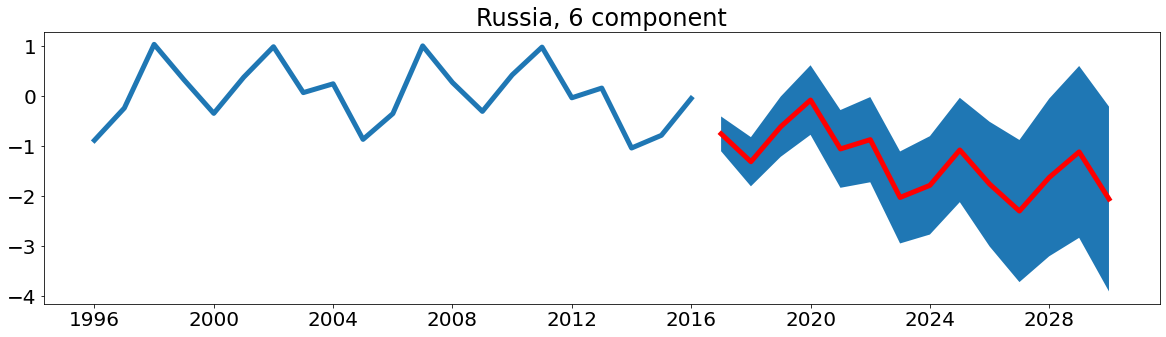

best parameters: (0, 0, 0, 0). AIC=29.604582120245027
best parameters: (0, 0, 0, 1). AIC=21.90641633090914
best parameters: (0, 0, 1, 0). AIC=16.330971453435133
                                     SARIMAX Results                                     
Dep. Variable:                                c7   No. Observations:                   21
Model:             SARIMAX(0, 1, 0)x(1, 0, 0, 9)   Log Likelihood                  -5.165
Date:                           Sat, 15 Aug 2020   AIC                             16.331
Time:                                   20:16:53   BIC                             19.318
Sample:                               01-01-1996   HQIC                            16.914
                                    - 01-01-2016                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------

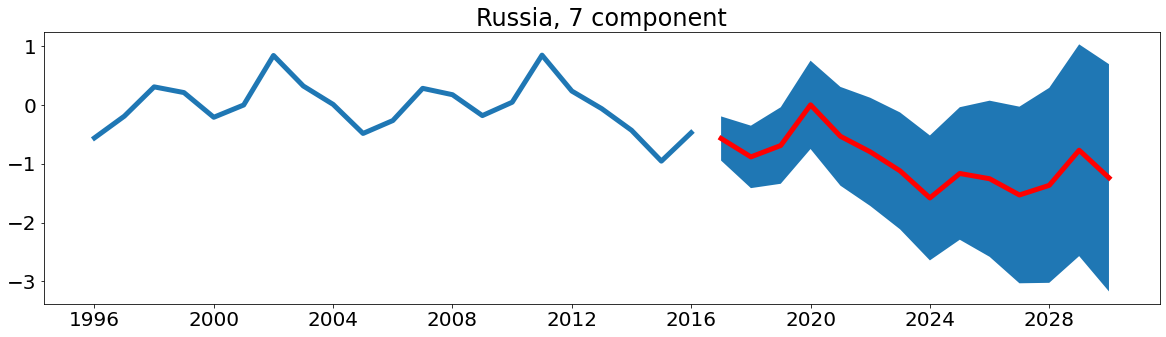

In [31]:
plt.rcParams['font.size'] = 20
plt.rcParams['lines.linewidth'] = 5

ff=pd.DataFrame(mds_representation[:21],columns=list(map(lambda x: 'c'+str(x+1),range(7))),index=irf2.index)
ff['x']=list(map(lambda x: x.year-1996,ff.index))
ff['x2']=ff['x']**2

lr=[]
mr=[]
ur=[]
models_r=[]
for el in range(7):
    ss1='c'+str(el+1)
    ps = range(0, 2) 
    d=1
    qs = range(0, 2) 
    Ps = range(0, 2) 
    D=0
    Qs = range(0, 2) 

    parameters = itertools.product(ps, qs, Ps, Qs)
    parameters_list = list(parameters)
    len(parameters_list)
    best_aic = 99999999999
    best_params=(8,1,1,1)
    excl_params=[]
# parameters_list=[(2,2,2,1)]

    warnings.filterwarnings('ignore')

    for param in parameters_list:
        if not (param in excl_params):
            #print (param)
            #try except нужен, потому что на некоторых наборах параметров модель не обучается
            try:
                model=sm.tsa.statespace.SARIMAX(ff[ss1], 
                                        order=(param[0], d, param[1]), 
                                        exog=ff[['x']],
                                        seasonal_order=(param[2], D, param[3], 9)).fit(disp=-1)
            #выводим параметры, на которых модель не обучается и переходим к следующему набору
            except ValueError:
                #print('wrong parameters:', param)
                continue
            aic = model.aic
            #сохраняем лучшую модель, aic, параметры
            if aic < best_aic:
                best_model = model
                best_aic = aic
                best_param = param
                print('best parameters: {}. AIC={}'.format(param,aic))
            #results.append([param, model.aic])
    
    warnings.filterwarnings('default')
    print(best_model.summary()) 
    res=best_model.get_prediction(start=len(ff), end=len(ff)+13,exog=ff1[['x']])
    models_r.append(res)
    res_lo= res.conf_int(alpha=0.1)['lower '+ss1]
    lr.append(res_lo)
    res_up= res.conf_int(alpha=0.1)['upper '+ss1]
    ur.append(res_up)
    res_mn= res.predicted_mean
    mr.append(res_mn)
    plt.figure(figsize=(20,5))
    plt.title ('Russia, {} component'.format(el+1))
    plt.plot(ff[ss1])
    plt.fill_between(res_lo.index,np.array(res_lo),np.array(res_up))
    plt.plot(res_mn,color='red')
    plt.show()

best parameters: (0, 0, 0, 0). AIC=42.09305965302587
                               SARIMAX Results                                
Dep. Variable:                     c1   No. Observations:                   21
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 -19.047
Date:                Sat, 15 Aug 2020   AIC                             42.093
Time:                        20:17:30   BIC                             44.085
Sample:                    01-01-1996   HQIC                            42.482
                         - 01-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x              0.1534      0.172      0.893      0.372      -0.183       0.490
sigma2         0.3933      0.146      2.688      0.007       0.106       0.680

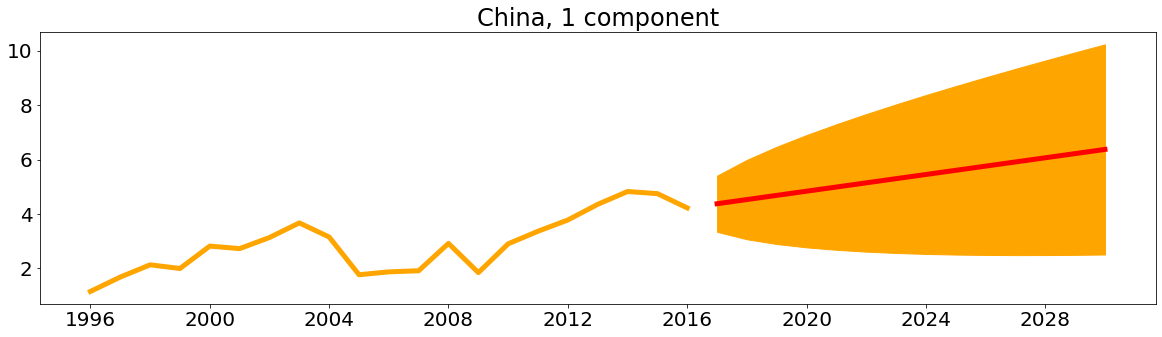

best parameters: (0, 0, 0, 0). AIC=77.38980162707976
                               SARIMAX Results                                
Dep. Variable:                     c2   No. Observations:                   21
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 -36.695
Date:                Sat, 15 Aug 2020   AIC                             77.390
Time:                        20:17:31   BIC                             79.381
Sample:                    01-01-1996   HQIC                            77.779
                         - 01-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x              0.4949      0.546      0.906      0.365      -0.575       1.565
sigma2         2.2970      0.556      4.131      0.000       1.207       3.387

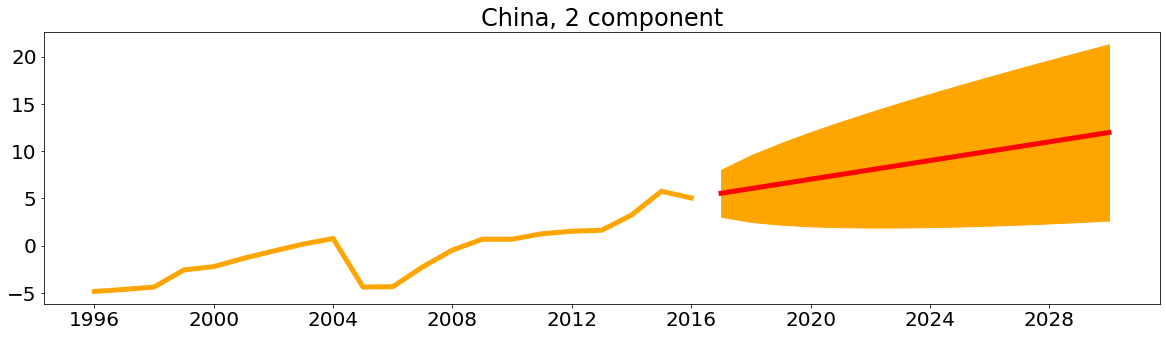

best parameters: (0, 0, 0, 0). AIC=67.54837835439105
                               SARIMAX Results                                
Dep. Variable:                     c3   No. Observations:                   21
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 -31.774
Date:                Sat, 15 Aug 2020   AIC                             67.548
Time:                        20:17:32   BIC                             69.540
Sample:                    01-01-1996   HQIC                            67.937
                         - 01-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x             -0.1279      0.277     -0.461      0.645      -0.672       0.416
sigma2         1.4043      0.437      3.215      0.001       0.548       2.260

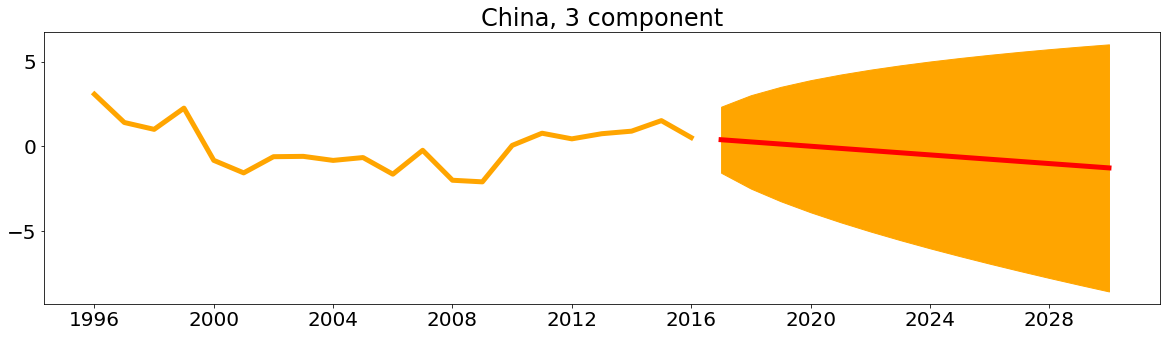

best parameters: (0, 0, 0, 0). AIC=78.19352564626678
best parameters: (1, 1, 0, 0). AIC=78.11017510348172
                               SARIMAX Results                                
Dep. Variable:                     c4   No. Observations:                   21
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 -35.055
Date:                Sat, 15 Aug 2020   AIC                             78.110
Time:                        20:17:33   BIC                             82.093
Sample:                    01-01-1996   HQIC                            78.888
                         - 01-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x              0.0193      0.546      0.035      0.972      -1.051       1.090
ar.L1         -0.4968    

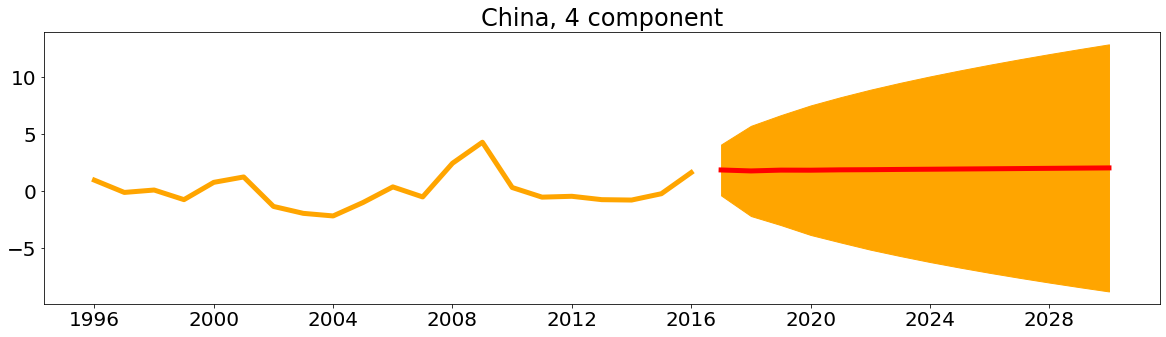

best parameters: (0, 0, 0, 0). AIC=40.18853360698464
best parameters: (0, 0, 1, 0). AIC=40.07584042865226
best parameters: (0, 1, 0, 0). AIC=39.14613400500908
best parameters: (1, 0, 0, 0). AIC=38.38512280334164
                               SARIMAX Results                                
Dep. Variable:                     c5   No. Observations:                   21
Model:               SARIMAX(1, 1, 0)   Log Likelihood                 -16.193
Date:                Sat, 15 Aug 2020   AIC                             38.385
Time:                        20:17:34   BIC                             41.372
Sample:                    01-01-1996   HQIC                            38.968
                         - 01-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------

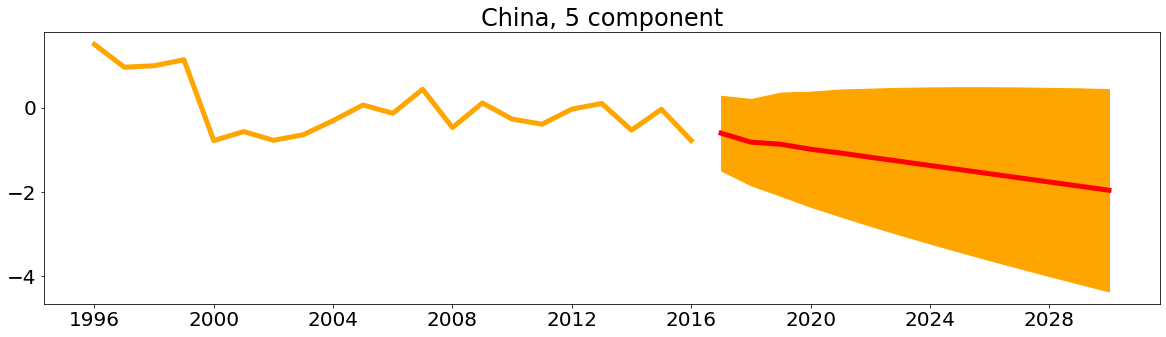

best parameters: (0, 0, 0, 0). AIC=76.46201588592412
best parameters: (0, 1, 0, 0). AIC=74.55849847411488
                               SARIMAX Results                                
Dep. Variable:                     c6   No. Observations:                   21
Model:               SARIMAX(0, 1, 1)   Log Likelihood                 -34.279
Date:                Sat, 15 Aug 2020   AIC                             74.558
Time:                        20:17:36   BIC                             77.546
Sample:                    01-01-1996   HQIC                            75.142
                         - 01-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x              0.0093      0.186      0.050      0.960      -0.356       0.374
ma.L1         -0.5619    

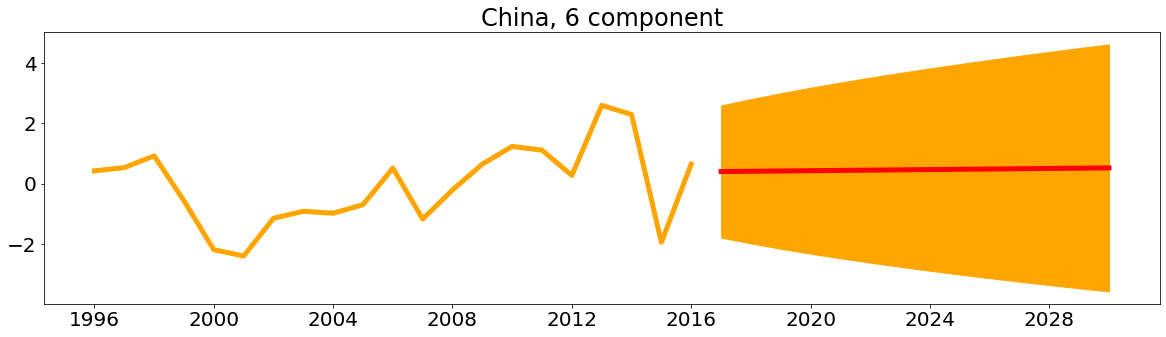

best parameters: (0, 0, 0, 0). AIC=82.18303973350434
best parameters: (0, 1, 0, 0). AIC=77.12073933276429
best parameters: (0, 1, 1, 0). AIC=76.4803321128313
                                     SARIMAX Results                                      
Dep. Variable:                                 c7   No. Observations:                   21
Model:             SARIMAX(0, 1, 1)x(1, 0, [], 6)   Log Likelihood                 -34.240
Date:                            Sat, 15 Aug 2020   AIC                             76.480
Time:                                    20:17:37   BIC                             80.463
Sample:                                01-01-1996   HQIC                            77.258
                                     - 01-01-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------

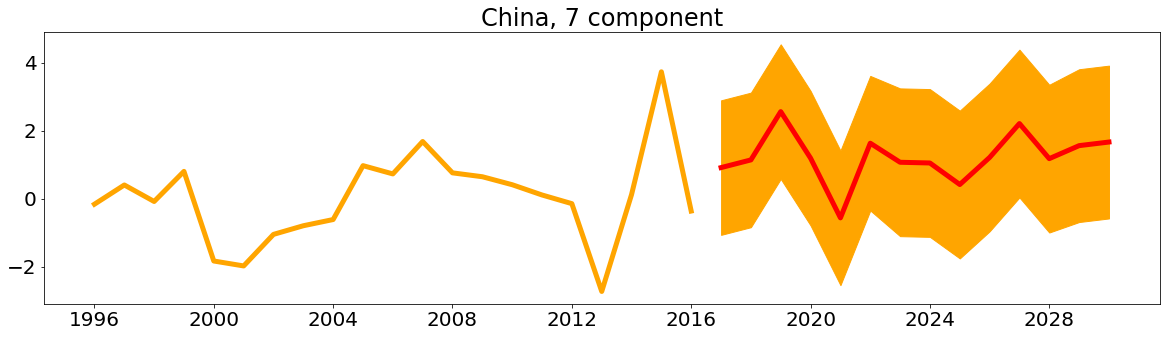

In [32]:
plt.rcParams['font.size'] = 20
plt.rcParams['lines.linewidth'] = 5
ff=pd.DataFrame(mds_representation[21:],columns=list(map(lambda x: 'c'+str(x+1),range(7))),index=irf2.index)
ff['x']=list(map(lambda x: x.year-1996,ff.index))
ff['x2']=ff['x']**2

lc=[]
mc=[]
uc=[]
models_c=[]

for el in range(7):
    ss1='c'+str(el+1)
    ps = range(0, 2) 
    d=1
    qs = range(0, 2) 
    Ps = range(0, 2) 
    D=0
    Qs = range(0, 1) 

    parameters = itertools.product(ps, qs, Ps, Qs)
    parameters_list = list(parameters)
    len(parameters_list)
    best_aic = 99999999999
    best_params=(8,1,1,1)
    excl_params=[]
# parameters_list=[(2,2,2,1)]

    warnings.filterwarnings('ignore')

    for param in parameters_list:
        if not (param in excl_params):
            #print (param)
            #try except нужен, потому что на некоторых наборах параметров модель не обучается
            try:
                model=sm.tsa.statespace.SARIMAX(ff[ss1], 
                                        order=(param[0], d, param[1]), 
                                        exog=ff[['x']],
                                        seasonal_order=(param[2], D, param[3], 6)).fit(disp=-1)
            #выводим параметры, на которых модель не обучается и переходим к следующему набору
            except ValueError:
                #print('wrong parameters:', param)
                continue
            aic = model.aic
            #сохраняем лучшую модель, aic, параметры
            if aic < best_aic:
                best_model = model
                best_aic = aic
                best_param = param
                print('best parameters: {}. AIC={}'.format(param,aic))
            #results.append([param, model.aic])
    
    warnings.filterwarnings('default')
    print(best_model.summary()) 
    res=best_model.get_prediction(start=len(ff), end=len(ff)+13,exog=ff1[['x']])
    models_c.append(res)
    res_lo= res.conf_int(alpha=0.1)['lower '+ss1]
    lc.append(res_lo)
    res_up= res.conf_int(alpha=0.1)['upper '+ss1]
    uc.append(res_up)
    res_mn= res.predicted_mean
    mc.append(res_mn)
    plt.figure(figsize=(20,5))
    plt.plot(ff[ss1],color='orange')
    plt.title ('China, {} component'.format(el+1))
    plt.fill_between(res_lo.index,np.array(res_lo),np.array(res_up),color='orange')
    plt.plot(res_mn,color='red')
    plt.show()

In [34]:
from matplotlib.patches import Ellipse
from matplotlib.collections import PatchCollection


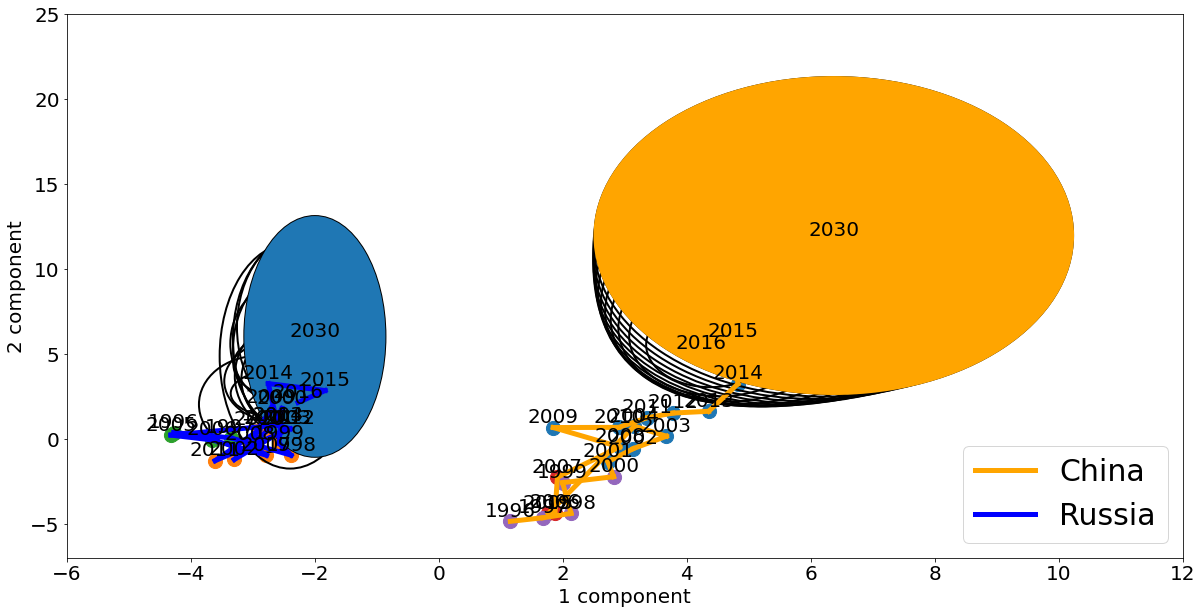

In [35]:
fig, ax = plt.subplots(figsize=(20,10))
ax.set_xlim((-6,12))
ax.set_ylim((-7,25))
xx=mds_representation.T[0]
yy=mds_representation.T[1]
xxr=mds_representation.T[0][:21]
yyr=mds_representation.T[1][:21]
xxc=mds_representation.T[0][21:]
yyc=mds_representation.T[1][21:]
ax.plot([xxc[0],xxc[1]],[yyc[0],yyc[1]],linewidth=5,color='orange')
ax.plot([xxr[0],xxr[1]],[yyr[0],yyr[1]],linewidth=5,color='blue')
ax.legend(['China','Russia'],fontsize=30,loc='lower right')
cc1=(lr[0]+ur[0])/2
cc2=(lr[1]+ur[1])/2
rc1=(-lr[0]+ur[0])
rc2=(-lr[1]+ur[1])
pp=[]
for el in rc2.index:
    ax.add_artist(Ellipse((cc1[el],cc2[el]),rc1[el],rc2[el],linewidth=2, fill=False))
ax.add_artist(Ellipse((cc1[rc2.index[-1]],cc2[rc2.index[-1]]),rc1[rc2.index[-1]],rc2[rc2.index[-1]],linewidth=2))
ax.text(cc1[rc2.index[-1]],cc2[rc2.index[-1]],'2030',horizontalalignment='center',fontsize=20)

cc1=(lc[0]+uc[0])/2
cc2=(lc[1]+uc[1])/2
rc1=(-lc[0]+uc[0])
rc2=(-lc[1]+uc[1])
pp=[]
for el in rc2.index:
    ax.add_artist(Ellipse((cc1[el],cc2[el]),rc1[el],rc2[el],linewidth=2, fill=False))
ax.add_artist(Ellipse((cc1[rc2.index[-1]],cc2[rc2.index[-1]]),rc1[rc2.index[-1]],rc2[rc2.index[-1]],linewidth=2,color='orange'))
ax.text(cc1[rc2.index[-1]],cc2[rc2.index[-1]],'2030',horizontalalignment='center',fontsize=20)

for el in range(2,len(xxc)):
    ax.plot([xxc[el-1],xxc[el]],[yyc[el-1],yyc[el]],linewidth=5,color='orange')
for el in range(2,len(xxr)):
    ax.plot([xxr[el-1],xxr[el]],[yyr[el-1],yyr[el]],linewidth=5,color='blue')
for el in range(6):
    ax.scatter(xx[res1==el],yy[res1==el],200)
for el in range(len(xxc)):
    if icf2.index[el].month==1:
        ax.text(xxc[el],yyc[el]+0.3,'{}'.format(icf2.index[el].year),horizontalalignment='center',fontsize=20)
for el in range(len(xxr)):
    if irf2.index[el].month==1:
        ax.text(xxr[el],yyr[el]+0.3,'{}'.format(irf2.index[el].year),horizontalalignment='center',fontsize=20)
plt.xlabel('1 component')
plt.ylabel('2 component')

plt.show()

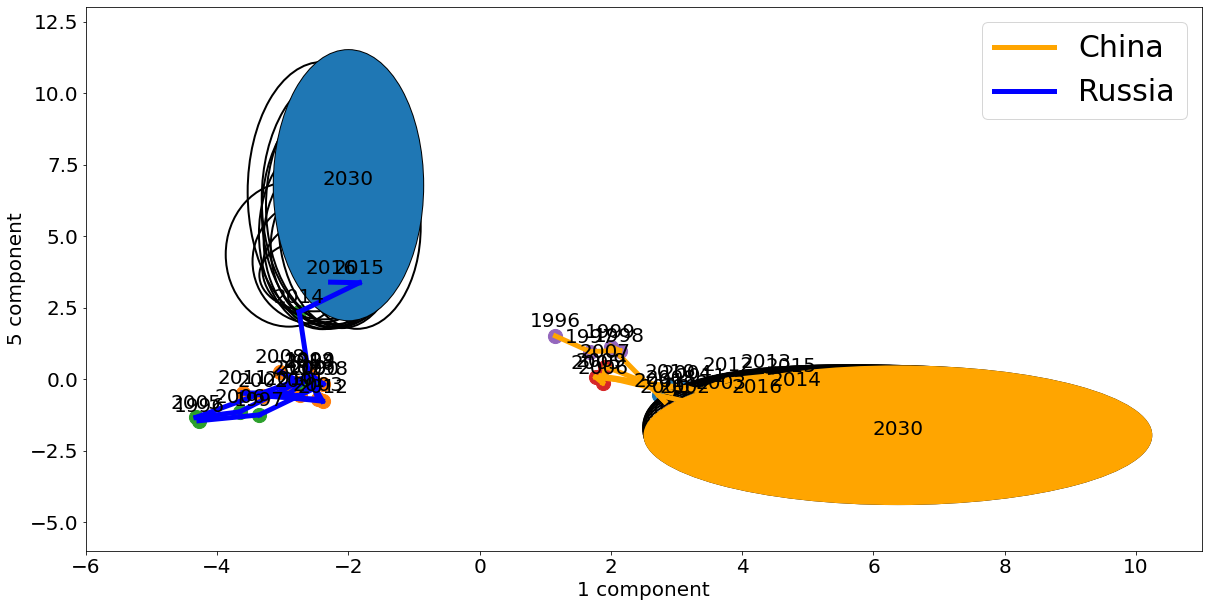

In [36]:
fig, ax = plt.subplots(figsize=(20,10))
ax.set_xlim((-6,11))
ax.set_ylim((-6,13))
xx=mds_representation.T[0]
yy=mds_representation.T[4]
xxr=mds_representation.T[0][:21]
yyr=mds_representation.T[4][:21]
xxc=mds_representation.T[0][21:]
yyc=mds_representation.T[4][21:]
ax.plot([xxc[0],xxc[1]],[yyc[0],yyc[1]],linewidth=5,color='orange')
ax.plot([xxr[0],xxr[1]],[yyr[0],yyr[1]],linewidth=5,color='blue')
ax.legend(['China','Russia'],fontsize=30,loc='upper right')
cc1=(lr[0]+ur[0])/2
cc2=(lr[4]+ur[4])/2
rc1=(-lr[0]+ur[0])
rc2=(-lr[4]+ur[4])
pp=[]
for el in rc2.index:
    ax.add_artist(Ellipse((cc1[el],cc2[el]),rc1[el],rc2[el],linewidth=2, fill=False))
ax.add_artist(Ellipse((cc1[rc2.index[-1]],cc2[rc2.index[-1]]),rc1[rc2.index[-1]],rc2[rc2.index[-1]],linewidth=2))
ax.text(cc1[rc2.index[-1]],cc2[rc2.index[-1]],'2030',horizontalalignment='center',fontsize=20)

cc1=(lc[0]+uc[0])/2
cc2=(lc[4]+uc[4])/2
rc1=(-lc[0]+uc[0])
rc2=(-lc[4]+uc[4])
pp=[]
for el in rc2.index:
    ax.add_artist(Ellipse((cc1[el],cc2[el]),rc1[el],rc2[el],linewidth=2, fill=False))
ax.add_artist(Ellipse((cc1[rc2.index[-1]],cc2[rc2.index[-1]]),rc1[rc2.index[-1]],rc2[rc2.index[-1]],linewidth=2,color='orange'))
ax.text(cc1[rc2.index[-1]],cc2[rc2.index[-1]],'2030',horizontalalignment='center',fontsize=20)

for el in range(2,len(xxc)):
    ax.plot([xxc[el-1],xxc[el]],[yyc[el-1],yyc[el]],linewidth=5,color='orange')
for el in range(2,len(xxr)):
    ax.plot([xxr[el-1],xxr[el]],[yyr[el-1],yyr[el]],linewidth=5,color='blue')
for el in range(6):
    ax.scatter(xx[res1==el],yy[res1==el],200)
for el in range(len(xxc)):
    if icf2.index[el].month==1:
        ax.text(xxc[el],yyc[el]+0.3,'{}'.format(icf2.index[el].year),horizontalalignment='center',fontsize=20)
for el in range(len(xxr)):
    if irf2.index[el].month==1:
        ax.text(xxr[el],yyr[el]+0.3,'{}'.format(irf2.index[el].year),horizontalalignment='center',fontsize=20)
plt.xlabel('1 component')
plt.ylabel('5 component')

plt.show()

In [72]:
it=itertools.product(np.arange(0.1,1,0.4),np.arange(0.1,1,0.4),np.arange(0.1,1,0.4),np.arange(0.1,1,0.4),
                     np.arange(0.1,1,0.4),np.arange(0.1,1,0.4),np.arange(0.1,1,0.4))
ll=3**7
ii=0
pii=0.01
ssl=list(map(lambda x: 'lower c'+str(x+1),range(7)))
ssu=list(map(lambda x: 'upper c'+str(x+1),range(7)))
ssp=list(map(lambda x: 'prob c'+str(x+1),range(7)))
it2=list(itertools.product(['lower c1','upper c1'],['lower c2','upper c2'],['lower c3','upper c3'],['lower c4','upper c4'],
                          ['lower c5','upper c5'],['lower c6','upper c6'],['lower c7','upper c7']))
clmns=list(map(lambda x: 'c'+str(x+1),range(7)))
yrs=np.array([range(2017,2031)]).T
mmm=np.zeros((0,26))
for rr in it:
    rrs=np.array([[np.product(rr)]*14]).T
    ii+=1
    #print(ii)    
    res_lo= models_r[0].conf_int(alpha=rr[0])
    for el in range(1,7):
        res_lo[ssl[el]]= models_r[el].conf_int(alpha=rr[el])[ssl[el]]
        res_lo[ssu[el]]= models_r[el].conf_int(alpha=rr[el])[ssu[el]]
    mm1=np.zeros((0,26))
    for el in it2:
        mm1=np.vstack((mm1,np.hstack((mms.inverse_transform(mdl.inverse_transform(res_lo[list(el)])),yrs,rrs))))
    mmm=np.vstack((mmm,mm1))
    del mm1
mmm

array([[2.90223257e-01, 2.33524900e-01, 3.65053015e-01, ...,
        1.04148282e+00, 2.01700000e+03, 1.00000000e-07],
       [2.93326117e-01, 2.26620906e-01, 3.63232775e-01, ...,
        1.04369396e+00, 2.01800000e+03, 1.00000000e-07],
       [2.96896585e-01, 2.29180521e-01, 3.79359591e-01, ...,
        9.90499555e-01, 2.01900000e+03, 1.00000000e-07],
       ...,
       [2.58151310e-01, 2.80265883e-01, 2.03588141e-01, ...,
        1.84064199e+00, 2.02800000e+03, 4.78296900e-01],
       [2.61165222e-01, 2.93012402e-01, 2.12314286e-01, ...,
        1.81831670e+00, 2.02900000e+03, 4.78296900e-01],
       [2.66460444e-01, 2.95510323e-01, 1.82202353e-01, ...,
        1.93670210e+00, 2.03000000e+03, 4.78296900e-01]])

In [73]:
dfr=pd.DataFrame(mmm,columns=list(irf2.columns)+['year','prob'])
msgh=[]
for el in range(2017,2031):
    dfc1=dfr[dfr.year==el]
    sgh=np.sum(dfc1.SGR*dfc1.prob)/np.sum(dfc1.prob)
    ssgh=np.sqrt(np.sum(((dfc1.SGR-sgh)**2)*dfc1.prob)/np.sum(dfc1.prob))
    msgh.append([sgh,ssgh])
psgh=pd.DataFrame(msgh,columns=['SGR','sSGR'],index=list(map(lambda x: datetime(x,1,1,0,0,0),range(2017,2031))))


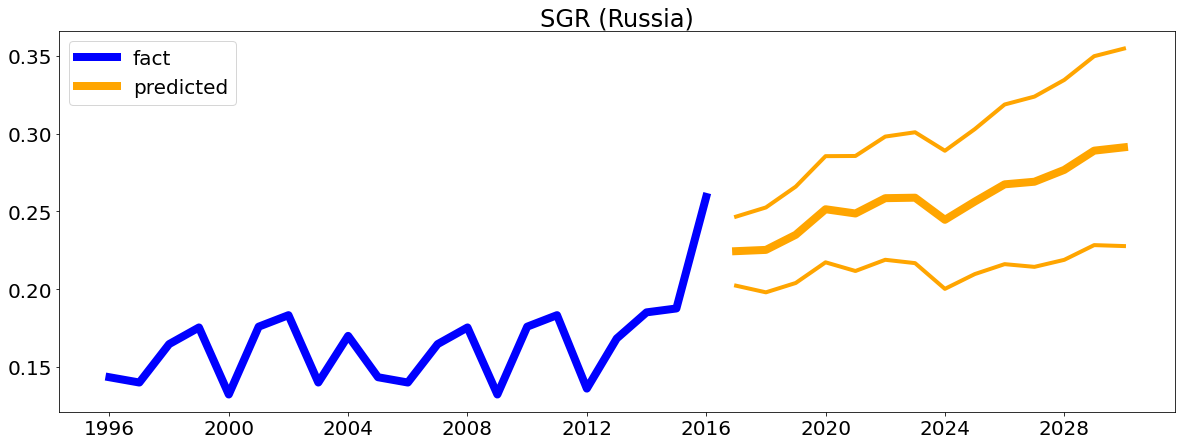

In [74]:
plt.figure(figsize=(20,7))
plt.plot(irf1.SGR,linewidth=8,color='blue')
plt.plot(psgh.SGR,linewidth=8,color='orange')
plt.plot(psgh.SGR+2*psgh.sSGR,linewidth=4,color='orange')
plt.plot(psgh.SGR-2*psgh.sSGR,linewidth=4,color='orange')
plt.title('SGR (Russia)')
plt.legend(['fact','predicted'])
plt.show()


In [75]:
it=itertools.product(np.arange(0.1,1,0.4),np.arange(0.1,1,0.4),np.arange(0.1,1,0.4),np.arange(0.1,1,0.4),
                     np.arange(0.1,1,0.4),np.arange(0.1,1,0.4),np.arange(0.1,1,0.4))
ll=3**7
ii=0
pii=0.01
ssl=list(map(lambda x: 'lower c'+str(x+1),range(7)))
ssu=list(map(lambda x: 'upper c'+str(x+1),range(7)))
ssp=list(map(lambda x: 'prob c'+str(x+1),range(7)))
it2=list(itertools.product(['lower c1','upper c1'],['lower c2','upper c2'],['lower c3','upper c3'],['lower c4','upper c4'],
                          ['lower c5','upper c5'],['lower c6','upper c6'],['lower c7','upper c7']))
clmns=list(map(lambda x: 'c'+str(x+1),range(7)))
yrs=np.array([range(2017,2031)]).T
mmm=np.zeros((0,26))
for rr in it:
    rrs=np.array([[np.product(rr)]*14]).T
    ii+=1
#    print(ii)    
    res_lo= models_c[0].conf_int(alpha=rr[0])
    for el in range(1,7):
        res_lo[ssl[el]]= models_c[el].conf_int(alpha=rr[el])[ssl[el]]
        res_lo[ssu[el]]= models_c[el].conf_int(alpha=rr[el])[ssu[el]]
    mm1=np.zeros((0,26))
    for el in it2:
        mm1=np.vstack((mm1,np.hstack((mms.inverse_transform(mdl.inverse_transform(res_lo[list(el)])),yrs,rrs))))
    mmm=np.vstack((mmm,mm1))
    del mm1
mmm

array([[ 1.54156435e-01,  2.34923999e-02,  1.84282997e-01, ...,
         1.03967796e+00,  2.01700000e+03,  1.00000000e-07],
       [ 1.77275837e-01,  4.11812262e-02,  2.14272886e-01, ...,
         9.80310025e-01,  2.01800000e+03,  1.00000000e-07],
       [ 1.84411452e-01,  4.93504015e-02,  2.40246352e-01, ...,
         8.74655852e-01,  2.01900000e+03,  1.00000000e-07],
       ...,
       [ 5.76281840e-02, -8.11848823e-03,  1.71012037e-01, ...,
         1.37644838e+00,  2.02800000e+03,  4.78296900e-01],
       [ 5.40301995e-02, -9.19633197e-03,  1.74743696e-01, ...,
         1.37590009e+00,  2.02900000e+03,  4.78296900e-01],
       [ 5.20932971e-02, -9.86719826e-03,  1.77221806e-01, ...,
         1.38999454e+00,  2.03000000e+03,  4.78296900e-01]])

In [76]:
dfc=pd.DataFrame(mmm,columns=list(icf2.columns)+['year','prob'])
msgh=[]
for el in range(2017,2031):
    dfc1=dfc[dfc.year==el]
    sgh=np.sum(dfc1.SGR*dfc1.prob)/np.sum(dfc1.prob)
    ssgh=np.sqrt(np.sum(((dfc1.SGR-sgh)**2)*dfc1.prob)/np.sum(dfc1.prob))
    msgh.append([sgh,ssgh])
cpsgh=pd.DataFrame(msgh,columns=['SGR','sSGR'],index=list(map(lambda x: datetime(x,1,1,0,0,0),range(2017,2031))))


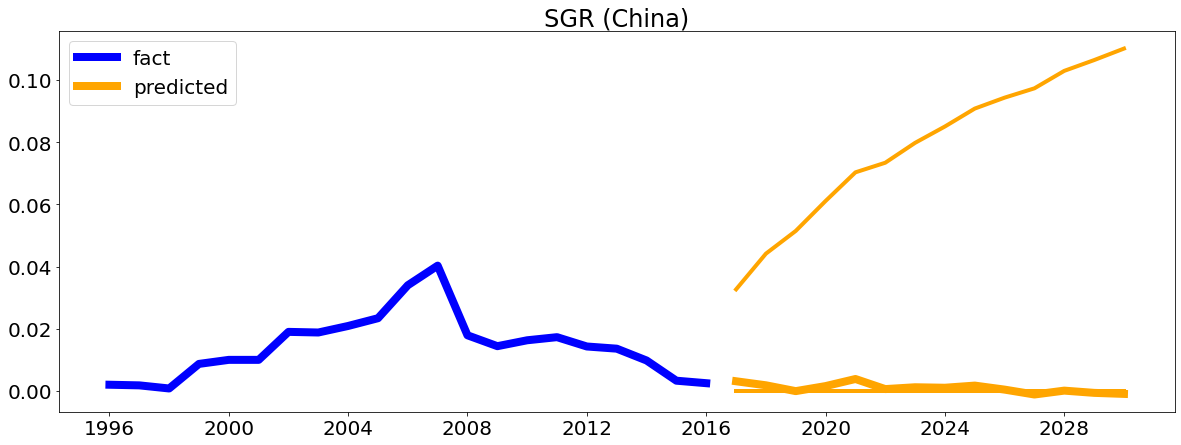

In [77]:
plt.figure(figsize=(20,7))
plt.plot(icf1.SGR,linewidth=8,color='blue')
plt.plot(cpsgh.SGR,linewidth=8,color='orange')
plt.plot(cpsgh.SGR+2*cpsgh.sSGR,linewidth=4,color='orange')
cpsgh['mSGR']=np.array(list(map(lambda x: 0 if x<0 else x,cpsgh.SGR-2*cpsgh.sSGR)))
plt.plot(cpsgh.mSGR,linewidth=4,color='orange')
plt.title('SGR (China)')
plt.legend(['fact','predicted'])
plt.show()


(0, 0, 1, 1)